# CS109B Final Project
## Yixuan Di, Jordan Turley, Shucheng Yan, Ruochen Zhao

In [1]:
import math
import string
import operator
import sys
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS 
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as hac

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import RandomizedSearchCV

import sklearn
import graphviz
from sklearn.tree import DecisionTreeRegressor

/Users/shuchengyan/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/shuchengyan/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/shuchengyan/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/shuchengyan/opt/anaconda3/lib/python3.7/site-

In [2]:
RANDOM_STATE = 123

In [3]:
# import all related data sets for EDA and modeling here
df = pd.read_excel('QA-0815TNX.xlsx',sheet_name=6)
dfIT = pd.read_csv('ITDASHBOARD_data.csv', encoding = 'unicode_escape')
df_pittsburgh = pd.read_csv('pittsburgh.csv')

# 1. introduction

## 1.1 Backgroud Information

The modern world of business uses machine learning and data science in almost every aspect of decision making. In the past, screening potential candidates and hiring, marketing, user recommendations, and much more had to be done by a physical person, but today is done by a computer using a sophisticated algorithm.

In addition, millions of dollars and hundreds of hours of employee work time is wasted each year on projects that began with high hopes, but due to some unforseen reason, had to be scrapped. This can be detremental to a company if it puts a significant number of its resources into a project that is ultimately a failure. A manager could potentially step in and say that a project is a bad idea and is unlikely to complete successfully and may ultimately be a waste, but to make an informed decision, this person would need to have worked on tens or hundreds of other similar projects.

In this study, we ask: is there a way to combine machine learning and data science with corporate and government project success prediction?

Clearly this is useful in two aspects. The first is inference. An interpretable model, like linear regression or a tree could allow us to see the most important predictors in what makes a project a success or a failure. This could allow corporate or govenrment teams to design a project such that it is likely to succeed. The second is prediction. Once a project is at the stage of starting, the manager could pass the parameters of the project through the algorithm and see important predictions with a confidence interval, like the probability that the project completes successfully, the predicted number of days that the project will go past the deadline, and the amount that the project goes over the budget. This knowledge could allow the project team to adjust the project throughout its lifecycle so that the project will likely be a success.

## 1.2 Project Goals

The first goal of this project was do do exploratory data analysis on several project datasets. Two of these datasets came from city governments and the third came from the US government. Even though we will only do modeling on one of these datasets, we still found it important to look at several datasets to observe trends and familiarize ourselves with these types of datasets. We also wanted to see how trends compared between these three datasets, in terms of variables given in the dataset, distributions of variables, and correlations between different variables.

Next, we wanted to use the models that we have learned in the first and second semesters of this class to do both statistical inference and prediction on this dataset. We want to use a variety of models, both simple, interpretable models and more complex predictive-oriented models.

In this dataset, there were two potential response variables given to us: the days that a project is early or late compared to the original deadline, and the cost escalation which compares the actual money spent to the original budget.

For statistical modeling, we intended to use a baseline model where we simply predict the mean of the training set, $k$-nearest neighbors, linear regression with ridge/lasso regularization, random forest, generalized additive models, and a simple feed-forward neural network. We will use all of these for prediction, but we can also use several of these for inference, like regression and random forest.

We hope to be able to use these models to both accurately predict the success of a project in terms of days late and the cost escalation, as well as make inferences about the aspects of a project that are most critical to success.

## 1.3 Dataset Description

We first give a short description of each of the data set used in EDA.

1. Dataset 1: Capital project dataset

All major infrastructure and information technology projects with a budget of $25 million or more that are currently active (in the design, procurement, or construction phase). This data set is from https://data.cityofnewyork.us/City-Government/Capital-Projects/n7gv-k5yt

2. Dataset 2: Pittsburgh Dataset

Published by the Allegheny County / City of Pittsburgh / Western PA Regional Data Center, this dataset includes information on construction projects from the City of Pittsburgh from 2014 to 2020. It includes fields such as responsible department, project description, and project budgets in different areas and different years. This dataset comes from https://catalog.data.gov/dataset/2014-capital-project-budgets

3. Dataset 3: IT Dashboard

The IT Dashboard dataset contains about 4100 IT-related US Government projects available so that the public and other federal agencies are able to view and track project progress and spending over time. The data comes from several government agencies like the Department of Defense, Social Security Administration, Department of Housing and Urban Development, NASA, and several others. This dataset contains fields like the project title and goals, start and intended finish date, a status field that is ‘Completed’ or ‘In-progress’, cost information, and others. This dataset comes from https://itdashboard.gov/.

# 2. EDA

## 2.1 Capital Project Dataset

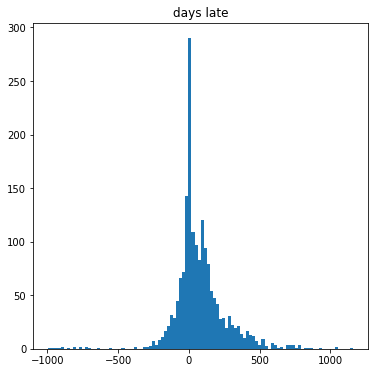

In [4]:
plt.figure(figsize=(6,6))
plt.title('days late')
plt.hist(df['Days Late'], bins=100)
plt.show()

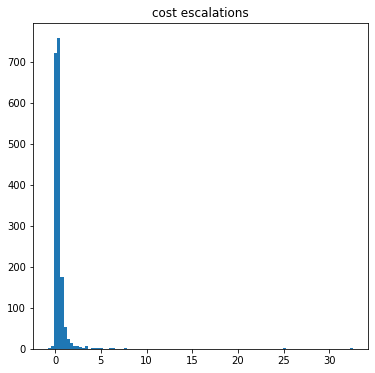

In [5]:
plt.figure(figsize=(6,6))
plt.title('cost escalations')
plt.hist(df['Cost Escalations'], bins=100)
plt.show()

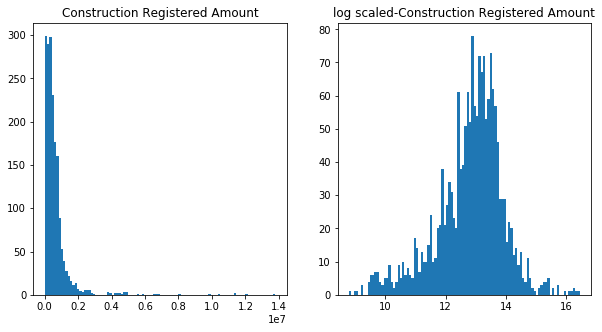

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('Construction Registered Amount')
ax2.set_title('log scaled-Construction Registered Amount')

a=ax1.hist(df['Construction Registered Amount '], bins=100)
a=ax2.hist(df['ln(cost)'], bins=100)

## 2.2 Pittsburgh Dataset

In [7]:
#If we standarize budgets by column, it will lose the relationship between years (the discounting factors). 
#Therefore, we don't standarize by columns.
#Right now, only 'cost xx' columns are numeric, We should also convert other columns to numeric types.

#Everything except for these non_numeric columns should be a float.
Non_numeric = ['Project Name', 'Functional Area', 'Responsible Department', 'Project Manager', 'Project Description'
              , 'Project Justification', 'New/Recurring/Continuing', 'Operating Budget Impact', 
               'Operating Budget Impact']
cols = df_pittsburgh.columns
first_cols = cols[:47]
# first_cols

In [8]:
#For example, in the above case, many budgets are in strings with a dollar sign.
convert = []
for i in first_cols:
    if i not in Non_numeric:
        convert.append(i)
        
df_pittsburgh_new = df_pittsburgh.copy()
for col in convert:
    original = np.array(df_pittsburgh[col])
    new = []
    for i in original:
        if isinstance(i, float):
            new.append(i)
        else:
            if (i[-1]=='-'):
                new.append(float('nan'))
            else:
                new.append(float(i[1:].replace(',', '')))
    df_pittsburgh_new[col] = np.array(new)

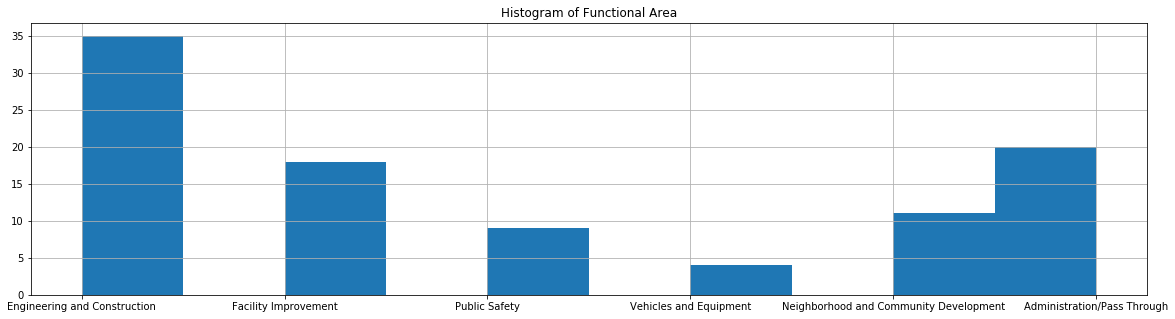

In [9]:
fig, ax = plt.subplots(figsize = (20,5))
df_pittsburgh['Functional Area'].hist()
plt.title('Histogram of Functional Area')
plt.show()

In [10]:
print("About ",sum(df_pittsburgh['Functional Area']=='Engineering and Construction')/len(df_pittsburgh['Functional Area'])*100, 
      "%of the functional area columns are 'Engineering and Construction'")

About  35.0 %of the functional area columns are 'Engineering and Construction'


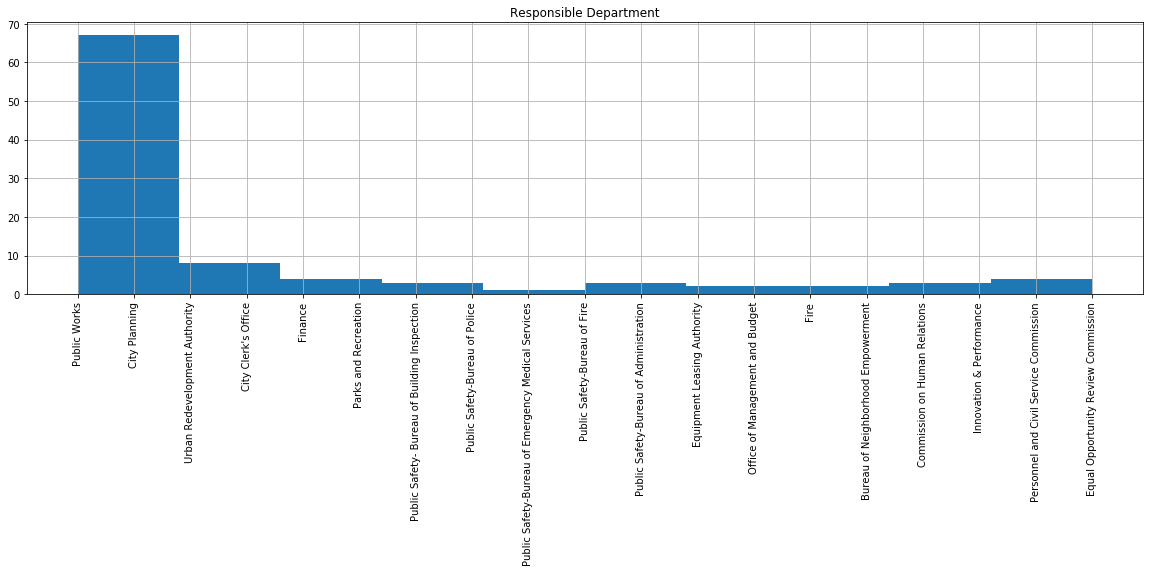

In [11]:
fig, ax = plt.subplots(figsize = (20,5))
df_pittsburgh['Responsible Department'].hist()
plt.xticks(rotation='vertical')
plt.title('Responsible Department')
plt.show()

In [12]:
print("About ",sum(df_pittsburgh['Responsible Department']=='Public Works')/len(df_pittsburgh['Responsible Department'])*100
     , "% of the responsible department columns are 'public works'.")

About  50.0 % of the responsible department columns are 'public works'.


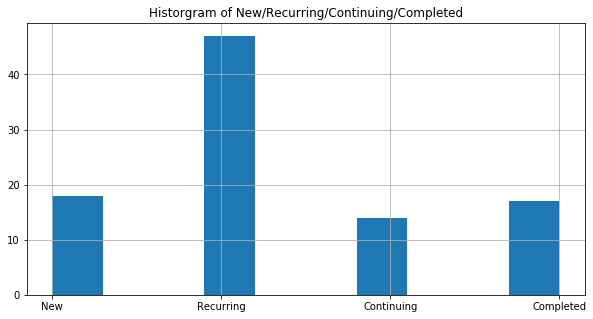

In [13]:
fig, ax = plt.subplots(figsize = (10,5))
df_pittsburgh_new['New/Recurring/Continuing'].hist()
plt.title('Historgram of New/Recurring/Continuing/Completed')
plt.show()

The main category of the projects is 'recurring'.

From the histograms above, we could see that categories of projects are mainly concentrated in one category. Therefore, when conducting analysis in the future, we could focus more on data balancing.

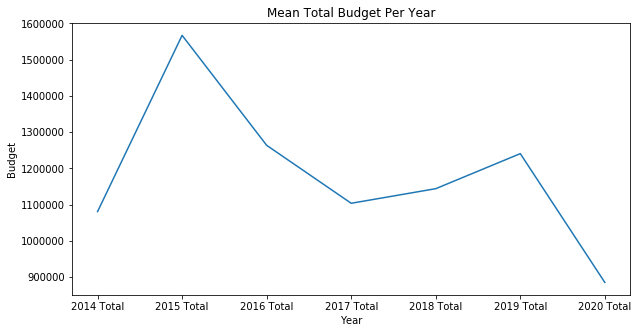

In [14]:
#20XX Total
Total = []
for i in cols:
    if i[-5:]=='Total':
        Total.append(i)
        
# Total
means = []
for col in Total[:-1]:
    means.append(np.mean(df_pittsburgh_new[col]))

fig, ax = plt.subplots(figsize = (10,5))
plt.plot(means)
plt.xticks(range(7), Total[:-1])
plt.title('Mean Total Budget Per Year')
plt.xlabel('Year')
plt.ylabel('Budget')
plt.show()

The mean budget accross the years range from 900,000 to 1,600,000.

The highest year was 2015 and the lowest year is 2020 (probably because we don't have all the projects right now)

## 2.3 IT Project Dataset

We first do some data processing. We drop unneccessary columns, fill in NA's, generate a column for the length of the project, which was the start date to the completion date, and we create a new column called 'Completed' which is as follows:

1. Project was successfully completed, i.e. 'Project Status' => 'Completed'
2. Project was not successfully completed. We say if a project is 'In-progress' but the expected completion date has passed, then the project was not successfully completed. There are issues with this, as the expected completion date of a project could have been a week ago, but it is just a bit behind schedule and will complete in a week, but there is no way for us to know this, so the best we can do for now is just say if the expected completion date has passed, then the project was not successfully completed.
3. Project is currently in-progress. We say if a project is 'In-progress' and the expected completion date is sometime in the future, then the project is currently in progress.

'Completed' is equal to 1 for successfully completed, 0 for not successfully completed, and -1 for currently in-progress. This is not perfect, but we had to generate some way to see if the project was still in progress or had failed.

In [15]:
# Some preliminary data processing
drop_cols = ['ï»¿"Unique Investment Identifier"',
             'Business Case ID',
             'Unique Project ID',
             'Project ID',
             'Agency Project ID']
dfIT.drop(drop_cols, axis = 1, inplace = True, errors = 'ignore')

# If 'Project Name' or 'Project Goal' is nan, convert it to an empty string
dfIT['Project Name'].fillna('', inplace = True)
dfIT['Project Goal'].fillna('', inplace = True)

# Add a new column for the length of the project. Days from Start Date to Completion Date
dfIT['Project Length (days)'] = (pd.DatetimeIndex(dfIT['Completion Date']) - pd.DatetimeIndex(dfIT['Start Date'])).days

COMPLETED = 1
NOT_COMPLETED = 0
IN_PROGRESS = -1
TODAY = pd.to_datetime('2020-04-12') # Downloaded dataset on this date

completed = np.zeros(len(dfIT))

# Loop over every row to determine status
for i1 in range(len(dfIT)):
    row = dfIT.iloc[i1]
    status = row['Project Status']
    completionDate = pd.to_datetime(row['Completion Date'])
    
    if status == 'Completed':
        completed[i1] = COMPLETED # Project successfully completed
    elif completionDate < TODAY:
        completed[i1] = NOT_COMPLETED # Project not successfully completed
    else:
        completed[i1] = IN_PROGRESS # Project currently in progress
    
dfIT['Completed'] = completed

First we simply check the proportions of each of the Completed labels. We see that about 75% of the projects are completed, 10% not completed, and 15% in-progress. If we want to train on completed vs. not completed, we may want to do some upsampling to make the data more balanced.

Text(0.5, 1.0, 'Proportion of Data Labels in Dataset')

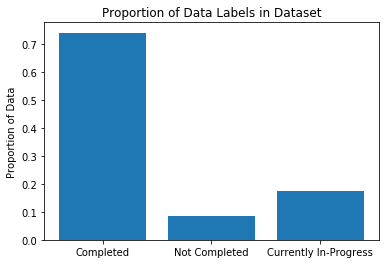

In [16]:
p1 = np.mean(dfIT['Completed'] == 1)
p2 = np.mean(dfIT['Completed'] == 0)
p3 = np.mean(dfIT['Completed'] == -1)

plt.bar(('Completed', 'Not Completed', 'Currently In-Progress'), (p1, p2, p3))
plt.ylabel('Proportion of Data')
plt.title('Proportion of Data Labels in Dataset')

Next, we look at the project life cycle cost. First I should note that I am not sure what the unit is on this number. It must be something like thousands of dollars, but I am not sure.

We see that basically all of the data is below 1000, so in the second plot, I limit the data to be less than certain values so we can get a better sense of the distribution, as well as the number in each category. We see that the majority of the data is between 0 and 10.

19 Projects with Project Life Cycle Cost > 1000
140 Projects with Project Life Cycle Cost > 100
912 Projects with Project Life Cycle Cost > 10
2776 Projects with Project Life Cycle Cost > 1
1386 Projects with Project Life Cycle Cost <= 1


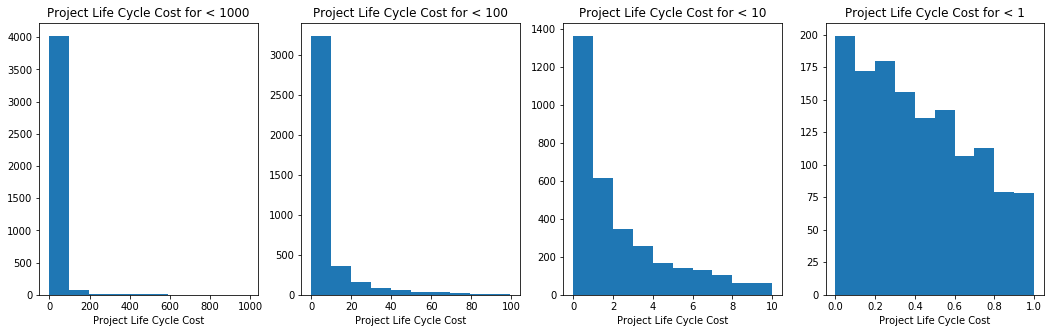

In [17]:
vals = (1000, 100, 10, 1)
plt.figure(figsize = (18, 5))
c = 1
for v in vals:
    plt.subplot(1, 4, c)
    plt.hist(dfIT[dfIT['Project Life Cycle Cost'] < v]['Project Life Cycle Cost'])
    plt.xlabel('Project Life Cycle Cost')
    plt.title('Project Life Cycle Cost for < ' + str(v))
    c += 1
    
for v in vals:
    t = np.sum(dfIT['Project Life Cycle Cost'] > v)
    print(t, 'Projects with Project Life Cycle Cost >', v)
t = np.sum(dfIT['Project Life Cycle Cost'] <= 1)
print(t, 'Projects with Project Life Cycle Cost <= 1')

Next, I wanted to look at the 'Schedule Color' and 'Cost Color'. I found some explanation of this field on the website, but I still wasn't exactly sure how to interpret it.

![color description](https://i.imgur.com/I4x2ylm.png)

I'm not really sure if this is calculated from the start or continuously updated over the life cycle of the project. However, we do see below for the Schedule Color, for not completed projects, most of them are Red, while completed projects are mostly Green. The distributions look pretty identical for the Cost Color. We will investigate this further to see if it can actually be used to predict the success of a project.

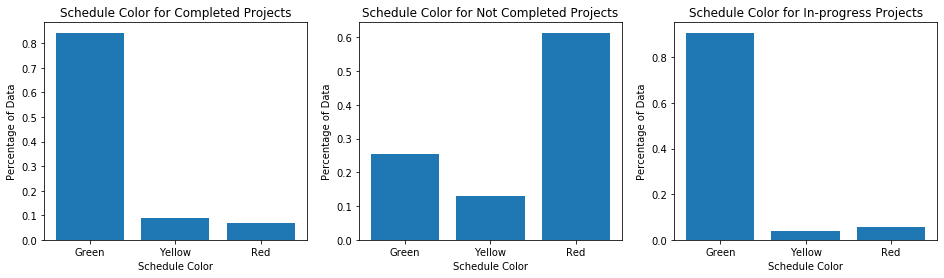

In [18]:
plt.figure(figsize = (16, 4))

completedVals = {1: 'Completed', 0: 'Not Completed', -1: 'In-progress'}

c = 1
for compl in (1, 0, -1):
    t = dfIT[dfIT['Completed'] == compl]['Schedule Color']
    p1 = np.mean(t == 'Green')
    p2 = np.mean(t == 'Yellow')
    p3 = np.mean(t == 'Red')
    
    plt.subplot(1, 3, c)
    plt.bar(('Green', 'Yellow', 'Red'), (p1, p2, p3))
    plt.xlabel('Schedule Color')
    plt.ylabel('Percentage of Data')
    plt.title('Schedule Color for ' + completedVals[compl] + ' Projects')
    
    c += 1

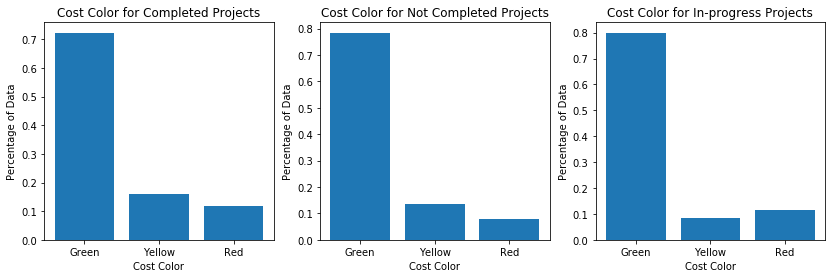

In [19]:
plt.figure(figsize = (14, 4))

completedVals = {1: 'Completed', 0: 'Not Completed', -1: 'In-progress'}

c = 1
for compl in (1, 0, -1):
    t = dfIT[dfIT['Completed'] == compl]['Cost Color']
    p1 = np.mean(t == 'Green')
    p2 = np.mean(t == 'Yellow')
    p3 = np.mean(t == 'Red')
    
    plt.subplot(1, 3, c)
    plt.bar(('Green', 'Yellow', 'Red'), (p1, p2, p3))
    plt.xlabel('Cost Color')
    plt.ylabel('Percentage of Data')
    plt.title('Cost Color for ' + completedVals[compl] + ' Projects')
    
    c += 1

Now, we begin to look at the text in the Project Name and Goal to see if there are some patterns in the goals of completed vs. not completed projects. First, we get the 50 most common English words from a text file that we will exclude from our analysis, since seeing that words like 'a', 'the', 'an', etc. were used is not interesting or helpful. Then, we get the counts of the words in the Name and Goal, find the most frequent, and plot them.

Overall, things look pretty similar between the categories. However, we may try to do some language modeling to determine if a project is successful or not. We could use a fairly simple model like Naive Bayes, or a more complex RNN to look at the project name and goal.

In [20]:
# Get the 50 most common English words from file
f = open('50_most_common_english.txt')
ignoreWords = set()
for word in f:
    word = word.strip()
    ignoreWords.add(word)
f.close()

ignoreWords.add('') # Ignore blank spaces too

t = iter(ignoreWords)
next(t), next(t), next(t), next(t), next(t) # Get a few vals

('', 'at', 'for', 'but', 'she')

In [21]:
def plotWords(wordsDict, title):
    sortedWords = sorted(wordsDict.items(), key = operator.itemgetter(1))[::-1]
    words = []
    counts = []
    i1 = 0
    count = 0
    while count < 20:
        wordCount = sortedWords[i1]
        if wordCount[0] not in ignoreWords:
            count += 1
            words.append(wordCount[0])
            counts.append(wordCount[1])
        i1 += 1
    plt.bar(words, counts)
    plt.xticks(words, rotation = 20)
    plt.ylabel('Word Counts')
    plt.title(title)

def getWordCounts(df, column):
    overallCounts = {}
    completedCounts = {}
    notCompletedCounts = {}
    inProgressCounts = {}
    for i1 in range(len(df)):
        row = df.iloc[i1]
        x = row[column]
        completed = row['Completed']
        for word in x.split():
            word = word.translate(str.maketrans('','',string.punctuation))
            word = word.lower()
            if word not in overallCounts:
                overallCounts[word] = 0
            overallCounts[word] += 1

            if completed == COMPLETED:
                if word not in completedCounts:
                    completedCounts[word] = 0
                completedCounts[word] += 1
            elif completed == NOT_COMPLETED:
                if word not in notCompletedCounts:
                    notCompletedCounts[word] = 0
                notCompletedCounts[word] += 1
            else:
                if word not in inProgressCounts:
                    inProgressCounts[word] = 0
                inProgressCounts[word] += 1
    return overallCounts, completedCounts, notCompletedCounts, inProgressCounts

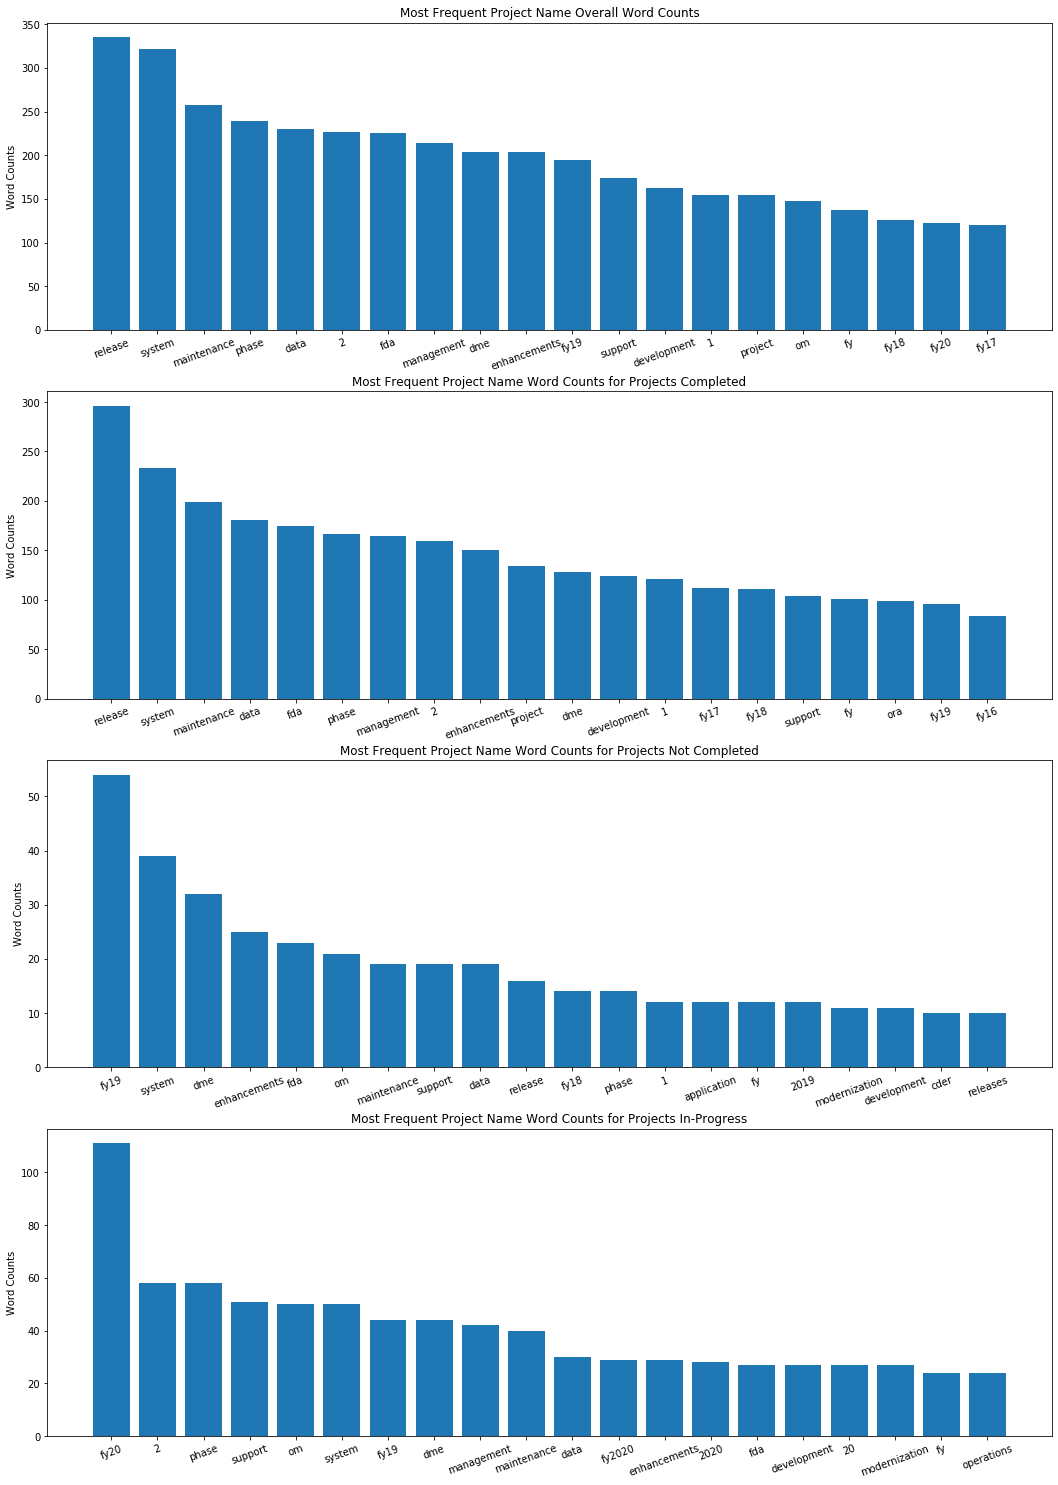

In [22]:
nameOverallCounts, nameCompletedCounts, nameNotCompletedCounts, nameInProgressCounts = getWordCounts(dfIT, 'Project Name')
plt.figure(figsize = (18, 26))
plt.subplot(4, 1, 1)
plotWords(nameOverallCounts, 'Most Frequent Project Name Overall Word Counts')
plt.subplot(4, 1, 2)
plotWords(nameCompletedCounts, 'Most Frequent Project Name Word Counts for Projects Completed')
plt.subplot(4, 1, 3)
plotWords(nameNotCompletedCounts, 'Most Frequent Project Name Word Counts for Projects Not Completed')
plt.subplot(4, 1, 4)
plotWords(nameInProgressCounts, 'Most Frequent Project Name Word Counts for Projects In-Progress')

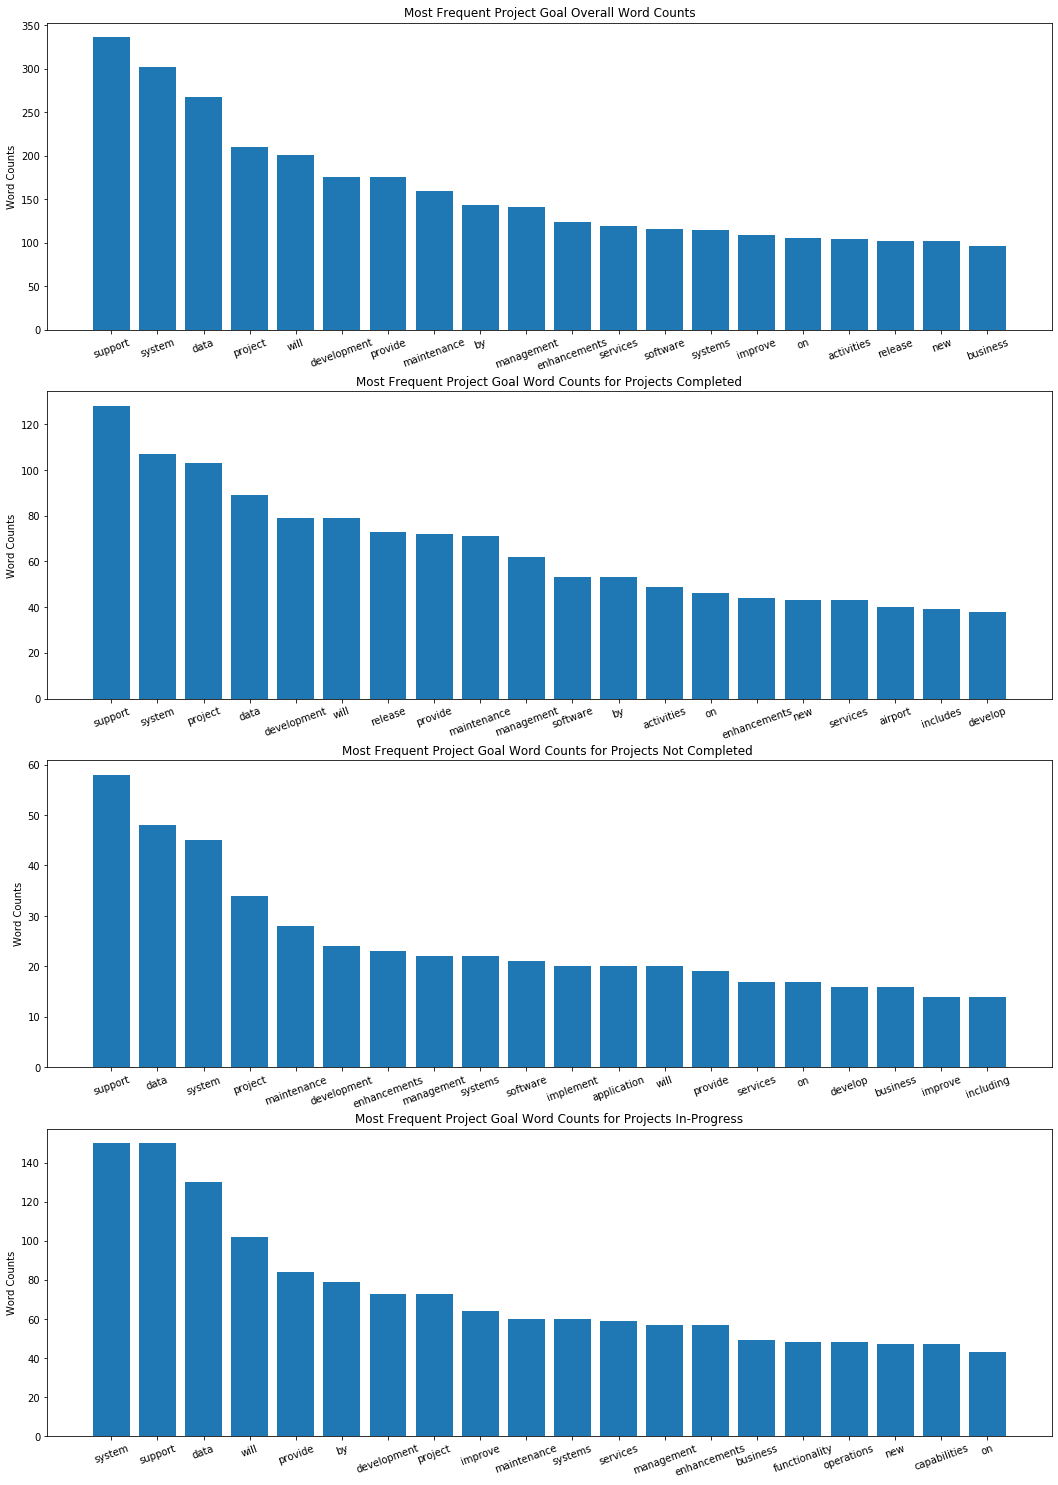

In [23]:
goalOverallCounts, goalCompletedCounts, goalNotCompletedCounts, goalInProgressCounts = getWordCounts(dfIT, 'Project Goal')
plt.figure(figsize = (18, 26))
plt.subplot(4, 1, 1)
plotWords(goalOverallCounts, 'Most Frequent Project Goal Overall Word Counts')
plt.subplot(4, 1, 2)
plotWords(goalCompletedCounts, 'Most Frequent Project Goal Word Counts for Projects Completed')
plt.subplot(4, 1, 3)
plotWords(goalNotCompletedCounts, 'Most Frequent Project Goal Word Counts for Projects Not Completed ')
plt.subplot(4, 1, 4)
plotWords(goalInProgressCounts, 'Most Frequent Project Goal Word Counts for Projects In-Progress')
plt.show()

I also wanted to see how the percentage of completed vs. not completed changes across the different agencies. We see this below. I excluded the projects that are currently in progress so we could more directly compare completed vs. not completed. I also included the number of projects that were completed or not completed by each agency in the x labels.

We see that most of the agencies look pretty similar, but some stand out. For example, the Social Security Administration, U.S. Agency for International Development, and the National Archives and Records Administration all have 100% completion rates. We must consider that none of these have more than 30 projects, and the last has only one, but this is still a good sign for these projects. In addition, NASA and the Department of Housing and Urban Development have significantly lower completion rates than the others: only about 60%. Again, it should be noticed that these also have very few projects. These are all things that should be considered. We have others, like Homeland Security, that has almost 300 projects and only about one or two percent that didn't complete successfully. We should be able to use this to help predict the success of a future project for a certain agency.

Text(0.5, 1.0, 'Completion Rate of Projects for each Agency')

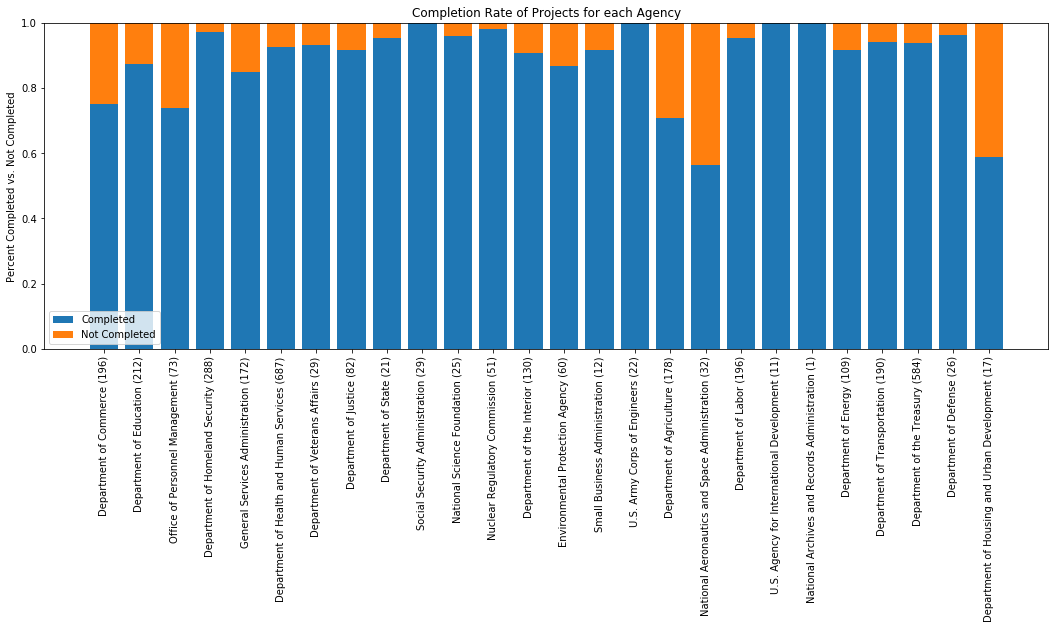

In [24]:
agencies = dfIT['Agency Name'].unique()

agencyCompleted = []
agencyNotCompleted = []
agencyNumProjects = []
for a in agencies:
    completedNum = np.sum((dfIT['Agency Name'] == a) & (dfIT['Completed'] == COMPLETED))
    notCompletedNum = np.sum((dfIT['Agency Name'] == a) & (dfIT['Completed'] == NOT_COMPLETED))
    
    agencyNumProjects.append(completedNum + notCompletedNum)
    
    t = completedNum / (completedNum + notCompletedNum)
    agencyCompleted.append(t)
    agencyNotCompleted.append(1 - t)

# Append the number of projects to each agency name
xlabels = []
for agency, num in zip(agencies, agencyNumProjects):
    xlabels.append(agency + ' (' + str(num) + ')')

plt.figure(figsize = (18, 6))
plt.bar(xlabels, agencyCompleted, label = 'a')
plt.bar(xlabels, agencyNotCompleted, bottom = agencyCompleted, label = 'b')
plt.xticks(xlabels, rotation = 'vertical')
plt.ylabel('Percent Completed vs. Not Completed')
plt.legend(('Completed', 'Not Completed'), loc = 'lower left')
plt.title('Completion Rate of Projects for each Agency')

## 2.4 Project Title Word Cloud

Below, we will continue with the Capital Project Dataset from New York City. This is our main dataset which we will use for modeling. We will create word clouds for the title of the projects.

In [25]:
def remove_stopwords(text):
    res = [w for w in text if w not in stopwords.words('english')]
    return res


def lemmatize(text, le):
    res = [le.lemmatize(w) for w in text]
    return res


def get_word(df):
    arr = df['text'].values
    res = []
    
    for lis in arr:
        for w in lis:
            res.append(w)
    return ' '.join(res)


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=50,
        max_font_size=40,
        scale=2
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(9, 9))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=12)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [26]:
tk = RegexpTokenizer(r'\w+')
le = WordNetLemmatizer()

In [27]:
df_title = df[['Project Title', 'Days Late', 'Cost Escalations']].copy()
df_title.loc[:,'is_late'] = df_title['Days Late'].apply(lambda x: 1 if x > 0 else 0)
df_title.loc[:,'is_overbudget'] = df_title['Cost Escalations'].apply(lambda x: 1 if x > 0 else 0)

df_title.loc[:, 'text'] = df_title['Project Title'].apply(lambda x: tk.tokenize(x.lower()))
df_title.loc[:, 'text'] = df_title['text'].apply(lambda x: remove_stopwords(x))
df_title.loc[:, 'text'] = df_title['text'].apply(lambda x: lemmatize(x, le))

In [28]:
words_nolate = get_word(df_title[df_title['is_late']==0])
words_islate = get_word(df_title[df_title['is_late']==1])
words_underbgt = get_word(df_title[df_title['is_overbudget']==0])
words_overbgt = get_word(df_title[df_title['is_overbudget']==1])

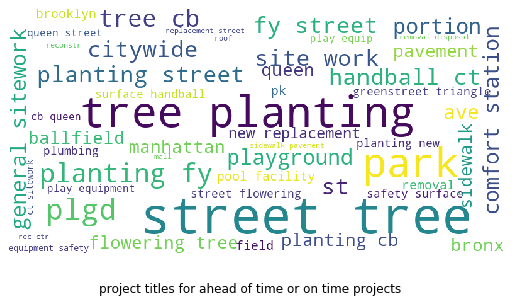

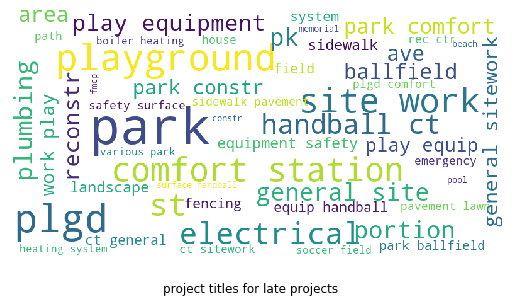

In [29]:
show_wordcloud(words_nolate, 'project titles for ahead of time or on time projects')
print('')
show_wordcloud(words_islate, 'project titles for late projects')

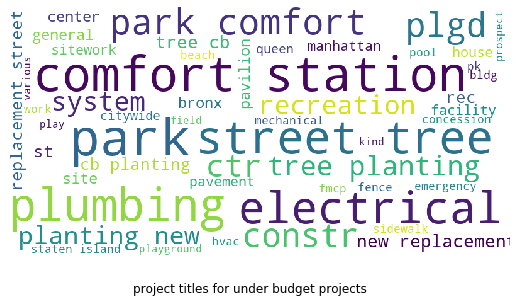

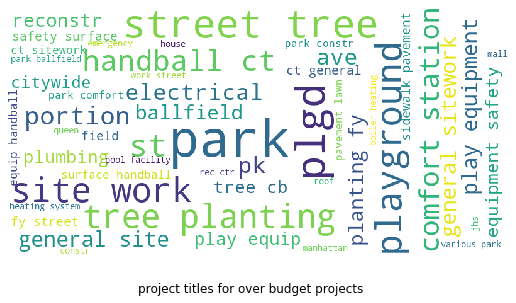

In [30]:
show_wordcloud(words_underbgt, 'project titles for under budget projects')
print('')
show_wordcloud(words_overbgt, 'project titles for over budget projects')

## 3. Data Preprocessing

We do some preprocessing on the dataset before we start modeling. We clean up some of the columns and create train and test sets that we will use across all of our models so we can directly compare the results.

In [31]:
def process_project_id(row):
    try:
        pid=row['Project No.']
        pid = pid.split('-')
        row['proj_id'] = pid[0]
        row['task_id'] = pid[1]
    except:
        row['proj_id'] = pid
        row['task_id'] = ''
    return row




def process_time(df, col_name):
    df[col_name +'_year'] = df[col_name].dt.year.astype('int', errors='ignore')
    df[col_name +'_month'] = df[col_name].dt.month.astype('int', errors='ignore')
    #df[col_name +'_day'] = df[col_name].dt.day.astype('int', errors='ignore')
    df[col_name +'_weekday'] = df[col_name].dt.weekday.astype('int', errors='ignore')
    return df

def process_time_batch(df, col_name_list):
    df = df.copy()
    for col in col_name_list:
        df = process_time(df, col)
    return df


def process_time_dff(df, time_pair):
    df=df.copy()
    time1 = time_pair[0]
    time2 = time_pair[1]
    colname = 'diff_' + time2 + '_' + time1
    df[colname] = (df[time2] - df[time1]).dt.days.astype('int', errors='ignore')
    return df

def process_time_dff_batch(df, time_pair_list):
    df = df.copy()
    for pair in time_pair_list:
        df = process_time_dff(df, pair)
    return df

In [32]:
# column name strip whitespace
col_strip = {col: col.strip() for col in df.columns}
df = df.rename(columns=col_strip)

In [33]:
# drop data_leakge columns
data_leakage = ['Final Inspection', 'Total Budget']
df = df.drop(columns=data_leakage, axis=1)

In [34]:
# fill missing schedule date by actual complation date - average delay
avg_diff = process_time_dff(df ,['Design Schedule and Completion Date', 'Design Actual Completion Date']).loc[:,'diff_Design Actual Completion Date_Design Schedule and Completion Date'].mean()
avg_diff

63.816883923029174

In [35]:
df['Design Schedule and Completion Date']=df['Design Schedule and Completion Date'].fillna(df['Design Actual Completion Date'] - datetime.timedelta(days=64))

In [36]:
# all the rows that still contain missing value after the above step. 
# can determine accordingly what to do with these only 6 rows
df[df.isnull().any(axis=1)]

,Project No.,Project Title,Design Schedule and Completion Date,Design Actual Completion Date,Title Request,Construction Registered Amount,Registration Approved; Pending Order-to- Work Date,Scheduled Completion Date,Status,Construction Unit,...,Engineering,Environmental Control Unit,Manhattan Team,Queens Team,Requirements Contract Unit,Staten Island Team,Technical Services (Randalls Island),Tree Unit,Days Late,Cost Escalations
572,CNYG-400MR,STREET TREE PLANTING FY 2001 - BKLYN & S.I.,2000-07-14,2000-07-14,NaT,409475.0,2000-10-16,2001-07-12,GI,T,...,0,0,0,0,0,0,0,1,-104,0.289456
615,M010-105M,THE ARSENAL - BASEMENT & EXTERIOR ACCESSIBILITY,NaT,NaT,2004-10-25,650000.0,2005-01-18,2005-07-28,GI,A;CPF,...,0,0,0,0,0,0,0,0,0,0.538462
623,M010-303M,CENTRAL PARK RESERVOIR - PERIMETER FENCE,NaT,NaT,NaT,1645000.0,2003-07-29,2004-07-27,FI,M;CPC,...,0,0,0,0,0,0,0,0,87,0.243161
674,M041-103M,HAMILTON PLACE PLGD (EMERGENCY),NaT,NaT,2003-05-28,259800.0,2003-05-28,2003-07-10,GI,M,...,0,0,1,0,0,0,0,0,-7,0.243264
1357,QG-796,PARK FACILITIES MAINTENANCE IN DIST.#5 & #6,1995-10-13,1995-10-12,NaT,174500.0,1996-02-21,1998-02-19,FI,RCU,...,0,0,0,0,1,0,0,0,0,1.510029
1378,R003-102M,BARRETT PARK - STATEN ISLAND ZOO - OTTER EXHIBIT,NaT,NaT,2002-04-12,435000.0,2004-04-19,2005-04-18,GI,R,...,0,0,0,0,0,1,0,0,-117,0.045977


In [37]:
# split project No. into project ID and task id
df = df.apply(process_project_id, axis=1)

In [38]:
# process project title
tk = RegexpTokenizer(r'\w+')
le = WordNetLemmatizer()

df_title = df[['Project Title', 'Days Late', 'Cost Escalations']]
df_title.loc[:, 'text'] = df_title['Project Title'].apply(lambda x: tk.tokenize(x.lower()))
df_title.loc[:, 'text'] = df_title['text'].apply(lambda x: remove_stopwords(x))
df_title.loc[:, 'text'] = df_title['text'].apply(lambda x: lemmatize(x, le))
df_title.loc[:, 'text'] = df_title['text'].apply(lambda x: ' '.join(x))

/Users/shuchengyan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/shuchengyan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [39]:
# extract the top 20 most frequent words in project title

# currently not added to the main data frame

# can be joined to the main data frame by "df=df.join(df_title)"

vec = CountVectorizer(stop_words='english', analyzer='word', strip_accents='ascii', max_features=20)
df_title = vec.fit_transform(df_title['text'])
df_title = pd.DataFrame(df_title.toarray(), columns=vec.get_feature_names())
print(np.array(vec.get_feature_names()))

['comfort' 'ct' 'electrical' 'general' 'handball' 'park' 'pavement'
 'planting' 'play' 'playground' 'plgd' 'plumbing' 'sidewalk' 'site'
 'sitework' 'st' 'station' 'street' 'tree' 'work']


In [40]:
# df = df.join(df_title)

In [41]:
# process time: extract year/month/date/weekday
time_list = ['Design Schedule and Completion Date', 'Design Actual Completion Date', 'Title Request', 'Registration Approved; Pending Order-to- Work Date',
            'Scheduled Completion Date']

df = process_time_batch(df, time_list)

In [42]:
# process time: extract time difference
time_pair_list = [['Design Schedule and Completion Date', 'Design Actual Completion Date'],
                  ['Title Request', 'Design Schedule and Completion Date'],
                  ['Design Actual Completion Date', 'Registration Approved; Pending Order-to- Work Date'],
                  ['Registration Approved; Pending Order-to- Work Date', 'Scheduled Completion Date']]
df = process_time_dff_batch(df, time_pair_list)

In [43]:
#df.to_csv('project_data.csv', index=None)
# final df for further processing
df.head()

,Project No.,Project Title,Design Schedule and Completion Date,Design Actual Completion Date,Title Request,Construction Registered Amount,Registration Approved; Pending Order-to- Work Date,Scheduled Completion Date,Status,Construction Unit,...,Registration Approved; Pending Order-to- Work Date_year,Registration Approved; Pending Order-to- Work Date_month,Registration Approved; Pending Order-to- Work Date_weekday,Scheduled Completion Date_year,Scheduled Completion Date_month,Scheduled Completion Date_weekday,diff_Design Actual Completion Date_Design Schedule and Completion Date,diff_Design Schedule and Completion Date_Title Request,diff_Registration Approved; Pending Order-to- Work Date_Design Actual Completion Date,diff_Scheduled Completion Date_Registration Approved; Pending Order-to- Work Date
0,B002-101M,AMERSFORT PARK RECONSTRUCTION,2000-12-15,2001-02-22,2000-09-08,572915.0,2001-06-18,2001-12-14,GI,B,...,2001,6,0,2001,12,4,69.0,98.0,116.0,179
1,B002-199,AMERSFORT PARK - GAZEBO & SPRAY FEATURE,2000-02-08,2000-03-06,1999-06-16,666792.0,2000-08-28,2001-02-23,GI,B,...,2000,8,0,2001,2,4,27.0,237.0,175.0,179
2,B008-101M,BETSY HEAD PLGD - INSTALL RECREATIONAL LIGHTIN...,2001-03-15,2001-04-11,2000-11-20,499619.0,2001-09-10,2002-06-06,GI,B,...,2001,9,0,2002,6,3,27.0,115.0,152.0,269
3,B008-199,BETSY HEAD PLAYGROUND - RUNNING TRACK,1999-03-31,1999-04-19,1998-08-10,915549.0,1999-08-18,2000-05-23,GI,CPM,...,1999,8,2,2000,5,1,19.0,233.0,121.0,279
4,B012-102M,BROWER PARK - RECONSTR. OF A PORTION OF PLAYGR...,2001-12-28,2002-03-01,2001-08-17,602129.0,2002-10-15,2003-10-09,GI,B,...,2002,10,1,2003,10,3,63.0,133.0,228.0,359


In [44]:
df.columns

Index(['Project No.', 'Project Title', 'Design Schedule and Completion Date',
       'Design Actual Completion Date', 'Title Request',
       'Construction Registered Amount',
       'Registration Approved; Pending Order-to- Work Date',
       'Scheduled Completion Date', 'Status', 'Construction Unit',
       'Coded Unit', 'ln(cost)', 'Electrical', 'Tree', 'Landscape', 'Plumbing',
       'Park', 'Station', 'Playground', 'Architecture', 'Bronx Team',
       'Brooklyn Team', 'Construction Project Manager',
       'Construction Resources', 'Croton Unit', 'Engineering',
       'Environmental Control Unit', 'Manhattan Team', 'Queens Team',
       'Requirements Contract Unit', 'Staten Island Team',
       'Technical Services (Randalls Island)', 'Tree Unit', 'Days Late',
       'Cost Escalations', 'proj_id', 'task_id',
       'Design Schedule and Completion Date_year',
       'Design Schedule and Completion Date_month',
       'Design Schedule and Completion Date_weekday',
       'Design Actu

In [45]:
remove_col = ['Project No.', 'Project Title', 'Design Schedule and Completion Date',
               'Design Actual Completion Date', 'Title Request', 'Registration Approved; Pending Order-to- Work Date',
             'Scheduled Completion Date', 'proj_id', 'task_id', 'is_late', 'is_overbudget']

classification_col = ['is_late', 'is_overbudget']

categorical_col = ['Status','Construction Unit', 'Coded Unit']

categorical_col_time = ['Design Schedule and Completion Date_year',
                       'Design Schedule and Completion Date_month',
                       'Design Schedule and Completion Date_weekday',
                       'Design Actual Completion Date_year',
                       'Design Actual Completion Date_month',
                       'Design Actual Completion Date_weekday', 'Title Request_year',
                       'Title Request_month', 'Title Request_weekday',
                       'Registration Approved; Pending Order-to- Work Date_year',
                       'Registration Approved; Pending Order-to- Work Date_month',
                       'Registration Approved; Pending Order-to- Work Date_weekday',
                       'Scheduled Completion Date_year', 'Scheduled Completion Date_month',
                       'Scheduled Completion Date_weekday']

numerical_col = ['Construction Registered Amount', 'ln(cost)','diff_Design Actual Completion Date_Design Schedule and Completion Date',
       'diff_Design Schedule and Completion Date_Title Request',
       'diff_Registration Approved; Pending Order-to- Work Date_Design Actual Completion Date',
       'diff_Scheduled Completion Date_Registration Approved; Pending Order-to- Work Date']


target1 = 'Days Late'
target2 = 'Cost Escalations'

In [46]:
# record classification labels
df.loc[:,'is_late'] = df['Days Late'].apply(lambda x: 1 if x > 0 else 0)
df.loc[:,'is_overbudget'] = df['Cost Escalations'].apply(lambda x: 1 if x > 0 else 0)
df_class_label = df[classification_col].copy()

In [47]:
# record target variables and remove it from the dataframe
y_dayslate = np.array(df[target1])
y_costesc = np.array(df[target2])
df = df.drop(columns=[target1, target2], axis=1)

In [48]:
# remove redundent variables
df = df.drop(columns=remove_col, axis=1)

In [49]:
# encode categorical variables
df1 = pd.get_dummies(df, columns=categorical_col+categorical_col_time, drop_first=True)

In [50]:
# check and fill missing rows with median 
print(len(df1[df1.isnull().any(axis=1)]))
df1 = df1.fillna(df1.median())

6


In [51]:
# train test split
X_train_day, X_test_day, y_train_day, y_test_day = train_test_split(df1, y_dayslate, test_size=0.2, random_state=RANDOM_STATE, shuffle=True)
X_train_cost, X_test_cost, y_train_cost, y_test_cost = train_test_split(df1, y_costesc, test_size=0.2, random_state=RANDOM_STATE, shuffle=True)

In [52]:
# for classification task
y_train_day_label = [1 if d > 0 else 0 for d in y_train_day]
y_test_day_label = [1 if d > 0 else 0 for d in y_test_day]

y_train_cost_label = [1 if c > 0 else 0 for c in y_train_cost]
y_test_cost_label = [1 if c > 0 else 0 for c in y_test_cost]

In [53]:
# standardize numerical variables
scaler_feature1 = StandardScaler()
X_train_day.loc[:,numerical_col] = scaler_feature1.fit_transform(X_train_day[numerical_col])
X_test_day.loc[:,numerical_col] = scaler_feature1.transform(X_test_day[numerical_col])


scaler_feature2 = StandardScaler()
X_train_cost.loc[:,numerical_col] = scaler_feature2.fit_transform(X_train_cost[numerical_col])
X_test_cost.loc[:,numerical_col] = scaler_feature2.transform(X_test_cost[numerical_col])


scaler_days = StandardScaler()
y_train_day = scaler_days.fit_transform(y_train_day.reshape(-1,1)).reshape(-1)
y_test_day = scaler_days.transform(y_test_day.reshape(-1,1)).reshape(-1)


scaler_cost = StandardScaler()
y_train_cost = scaler_cost.fit_transform(y_train_cost.reshape(-1,1)).reshape(-1)
y_test_cost = scaler_cost.transform(y_test_cost.reshape(-1,1)).reshape(-1)

/Users/shuchengyan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/shuchengyan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/shuchengyan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [54]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

## 4. Modeling

Below, we create several statistical models for the dataset and analyze the performance.

### 4.1 Baseline

In [55]:
# 4.1.1 model specific data preprocessing
#X_train_day, X_test_day, y_train_day, y_test_day

avg_days_late = np.mean(y_train_day)

avg_cost = np.mean(y_train_cost)

In [56]:
# 4.1.2 model building
dayslate = np.ones(np.shape(np.array(y_test_day)))*avg_days_late
cost = np.ones(np.shape(np.array(y_test_cost)))*avg_cost

In [57]:
# 4.1.3 model evaluation
r2_cost = r2_score(y_test_cost, cost)
mse_cost = mean_squared_error(y_test_cost, cost) * np.sqrt(scaler_cost.var_)[0]
mape_cost = mean_absolute_percentage_error(y_test_cost, cost)

r2_day = r2_score(y_test_day, dayslate)
mse_day = mean_squared_error(y_test_day, dayslate) * np.sqrt(scaler_days.var_)[0]
mape_day = mean_absolute_percentage_error(y_test_day, dayslate)

print('BASELINE MODEL')
df_rf_b = pd.DataFrame([[mse_day, mape_day], [mse_cost, mape_cost]], 
                     index=['days late', 'cost escalation'], columns=['MSE', 'MAPE'])
df_rf_b

BASELINE MODEL


,MSE,MAPE
days late,183.282298,1.0
cost escalation,0.201931,1.0


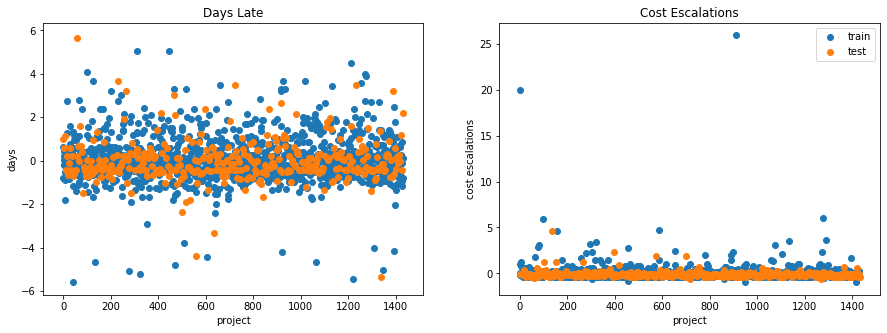

In [58]:
# 4.1.4 model summary/insights/graphs/table
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].scatter(range(len(y_train_day)), y_train_day, label='train')
ax[0].scatter(np.linspace(0, len(y_train_day), num = len(y_test_day)), y_test_day, label='test')
ax[0].set_xlabel('project')
ax[0].set_ylabel('days')
ax[0].set_title('Days Late')

ax[1].scatter(range(len(y_train_cost)), y_train_cost, label='train')
ax[1].scatter(np.linspace(0, len(y_train_day), num = len(y_test_day)), y_test_cost, label='test')
ax[1].set_xlabel('project')
ax[1].set_ylabel('cost escalations')
ax[1].set_title('Cost Escalations')
plt.legend()
plt.show()

From the graphs, we could see that the distribution from test and training sets are very similar. Therefore, the R squared value for the baseline model is very close to zero. By observing MSE, however, we see that the MSE for predicting days late is much larger. This is because cost escalations are usually very close together except for a few outliers. MAPE's are both one as expected. For further models, we will aim to improve on top of the baseline model. And it might be harder to predict cost escalations than days late, as observed from the baseline model.

### 4.2 $k$-NN

#### Days Late

First, we use a simple $k$-NN model to predict the number of days late a project is. It seems like this model may be effective since it finds the most similar projects in distance to given project. If there is a group of projects that are all similar and were all late, then we would expect another similar project to be late.

We use cross-validation to determine the best value of $k$.

In [59]:
# Use cross-validation to select the best k value
bestK = 0
bestScore = 0

kVals = 1, 3, 5, 10, 25, 50, 75, 100, 150, 200, 250, 300
r2TrainVals = []
r2CVVals = []
r2TestVals = []

for k in kVals:
    knn = KNeighborsRegressor(n_neighbors = k).fit(X_train_day, y_train_day)
    r2TrainVals.append(knn.score(X_train_day, y_train_day))
    r2TestVals.append(knn.score(X_test_day, y_test_day))
    score = np.mean(cross_val_score(knn, X_train_day, y_train_day, cv = 3))
    r2CVVals.append(score)
    if score > bestScore:
        bestScore = score
        bestK = k

bestScore.round(3), bestK

(0.264, 10)

We see the best value is $k = 10$ with $R^2 = 0.264$. This is a pretty low $R^2$, but we are still doing a lot better than simply predicting the average. Below, we look at how the $R^2$ values change with $k$.

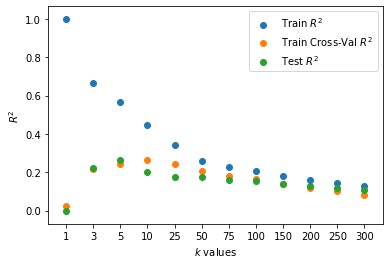

In [60]:
kValsStr = [str(k) for k in kVals]
plt.scatter(kValsStr, r2TrainVals, label = 'Train $R^2$')
plt.scatter(kValsStr, r2CVVals, label = 'Train Cross-Val $R^2$')
plt.scatter(kValsStr, r2TestVals, label = 'Test $R^2$')
plt.xlabel('$k$ values')
plt.ylabel('$R^2$')
plt.legend()

The distribution looks pretty standard. Low $k$ values yield low $R^2$ scores for cross-validated points and test points, and we find the optimal around $k = 5$ or $k = 10$.

In [61]:
knnR = KNeighborsRegressor(n_neighbors = bestK).fit(X_train_day, y_train_day)
pred = knnR.predict(X_test_day)
r2 = r2_score(y_test_day, pred)
mse = mean_squared_error(y_test_day, pred) * np.sqrt(scaler_days.var_)[0]
mape = mean_absolute_percentage_error(y_test_day, pred)


print('R^2 =', r2.round(3))
print('MSE =', mse.round(3))
print('sqrt(MSE) =', np.sqrt(mse).round(3))
print('MAPE =', mape.round(3))

R^2 = 0.203
MSE = 146.053
sqrt(MSE) = 12.085
MAPE = 1.939


With $k = 10$ we get an $R^2 = 0.203$ and a mean-squared error of about 146, which means that our predictions are off on average by about 12 days.

While our $R^2$ is low and our predictions are not very good, we do gain some information from this simple model. We see the optimal value of $k$ is around 10, which seems pretty typical. This is not too low and not too high. If we would like to make inferences about a given project, we may want to look at around ten similar projects and see what the results of these were.

#### Cost Escalation

Below, we repeat the same process for predicting the cost escalation of a project.

In [62]:
# Use cross-validation to select the best k value
bestK = 0
bestScore = 0

kVals = 1, 3, 5, 10, 25, 50, 75, 100, 150, 200, 250, 300
r2TrainVals = []
r2CVVals = []
r2TestVals = []

for k in kVals:
    knn = KNeighborsRegressor(n_neighbors = k).fit(X_train_cost, y_train_cost)
    r2TrainVals.append(knn.score(X_train_cost, y_train_cost))
    r2TestVals.append(knn.score(X_test_cost, y_test_cost))
    score = np.mean(cross_val_score(knn, X_train_cost, y_train_cost, cv = 3))
    r2CVVals.append(score)
    if score > bestScore:
        bestScore = score
        bestK = k

bestScore, bestK

(0.0016807178730709287, 250)

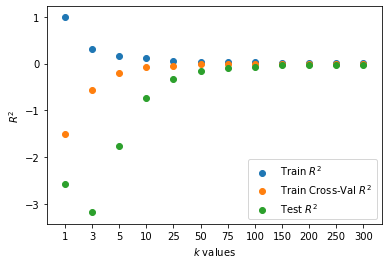

In [63]:
kValsStr = [str(k) for k in kVals]
plt.scatter(kValsStr, r2TrainVals, label = 'Train $R^2$')
plt.scatter(kValsStr, r2CVVals, label = 'Train Cross-Val $R^2$')
plt.scatter(kValsStr, r2TestVals, label = 'Test $R^2$')
plt.xlabel('$k$ values')
plt.ylabel('$R^2$')
plt.legend()

In [64]:
knnR = KNeighborsRegressor(n_neighbors = bestK).fit(X_train_cost, y_train_cost)
pred = knnR.predict(X_test_cost)
r2 = r2_score(y_test_cost, pred)
mse = mean_squared_error(y_test_day, pred) * np.sqrt(scaler_days.var_)[0]
mape = mean_absolute_percentage_error(y_test_day, pred)

print('R^2 =', r2.round(3))
print('MSE =', mse.round(3))
print('sqrt(MSE) =', np.sqrt(mse).round(3))
print('MAPE =', mape.round(3))

R^2 = -0.024
MSE = 180.226
sqrt(MSE) = 13.425
MAPE = 1.077


We draw more interesting conclusions from $k$-NN to predict the cost escalation of a project. We actually get a negative value of $R^2 = -0.024$, which is a bit worse than simply predicting the average. This means that it is much harder to predict the cost escalation than the days late. We were not able to predict the days late with a large degree of accuracy, but the $R^2$ was still significantly higher than zero, but here it is worse than the baseline model, meaning there is very little that we are doing in our predictions as opposed to if we simply predicted the average.

The reason that our $R^2$ is so close to zero is because the $k$ value we find using cross-validation is very high. We find $k = 250$ gives the optimal $R^2$, which means that we take a very large average. However, we would actually be better using a larger $k$ which would yield the overall average and $R^2 = 0$. We will see how well we can predict these using more sophisticated models below.

### 4.3 Regression

#### 4.3.1 Linear Regression

In [65]:
#model building
day_reg = LinearRegression()
day_reg.fit(X_train_day, y_train_day)
pred_day = day_reg.predict(X_test_day)

cost_reg = LinearRegression()
cost_reg.fit(X_train_cost, y_train_cost)
pred_cost = cost_reg.predict(X_test_cost)

In [66]:
# model evaluation
r2_cost = r2_score(y_test_cost, pred_cost)
mse_cost = mean_squared_error(y_test_cost, pred_cost) * np.sqrt(scaler_cost.var_)[0]
mape_cost = mean_absolute_percentage_error(y_test_cost, pred_cost)

r2_day = r2_score(y_test_day, pred_day)
mse_day = mean_squared_error(y_test_day, pred_day) * np.sqrt(scaler_days.var_)[0]
mape_day = mean_absolute_percentage_error(y_test_day, pred_day)

print('LINEAR REGRESSION')
df_rf_l = pd.DataFrame([[mse_day, mape_day], [mse_cost, mape_cost]], 
                     index=['days late', 'cost escalation'], columns=['MSE', 'MAPE'])
df_rf_l

LINEAR REGRESSION


,MSE,MAPE
days late,3.080816e+22,5.513783e+09
cost escalation,9.246091e+22,6.527342e+10


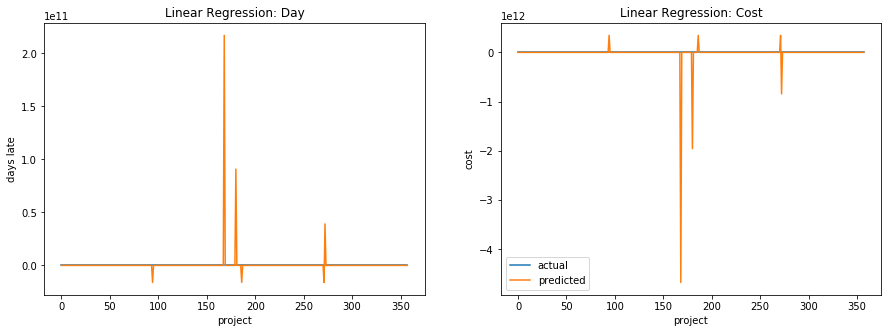

In [67]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].plot(y_test_day, label='actual')
ax[0].plot(pred_day, label='predicted')
ax[0].set_title('Linear Regression: Day')
ax[0].set_xlabel('project')
ax[0].set_ylabel('days late')
ax[1].plot(y_test_cost, label='actual')
ax[1].plot(pred_cost, label='predicted')
ax[1].set_title('Linear Regression: Cost')
ax[1].set_xlabel('project')
ax[1].set_ylabel('cost')
plt.legend()
plt.show()

Linear regression gives extremely large MSE and MAPE becuase linear regression generates extremely abnormal coefficients. This is becuase we have a lot of features comapred to the number of data points and there could be multicollineariy issue so the solution is degenerated. As a result, linear regression underperforms the baseline model. Adding L1 and L2 penalties or PCA would eliminate these multicollinearty issues and will be explored in the following sections.

#### 4.3.2 Lasso Regression

In [68]:
#model building
day_reg = Lasso(alpha = 0.01, max_iter = 10000)
day_reg.fit(X_train_day, y_train_day)
pred_day = day_reg.predict(X_test_day)

cost_reg = Lasso(alpha = 1, max_iter = 10000)
cost_reg.fit(X_train_cost, y_train_cost)
pred_cost = cost_reg.predict(X_test_cost)

In [69]:
# model evaluation
r2_cost = r2_score(y_test_cost, pred_cost)
mse_cost = mean_squared_error(y_test_cost, pred_cost) * np.sqrt(scaler_cost.var_)[0]
mape_cost = mean_absolute_percentage_error(y_test_cost, pred_cost)

r2_day = r2_score(y_test_day, pred_day)
mse_day = mean_squared_error(y_test_day, pred_day) * np.sqrt(scaler_days.var_)[0]
mape_day = mean_absolute_percentage_error(y_test_day, pred_day)

print('LINEAR REGRESSION')
display(df_rf_l)
print('')
print('LASSO REGRESSION')
df_rf_lasso = pd.DataFrame([[mse_day, mape_day], [mse_cost, mape_cost]], 
                     index=['days late', 'cost escalation'], columns=['MSE', 'MAPE'])

display(df_rf_lasso)

LINEAR REGRESSION


,MSE,MAPE
days late,3.080816e+22,5.513783e+09
cost escalation,9.246091e+22,6.527342e+10



LASSO REGRESSION


,MSE,MAPE
days late,147.093539,1.768064
cost escalation,0.201931,1.000000


With L-1 penalty, the performance improved a lot. Especially for the cost predictions. Therefore, we could see that the cost predictions had a lot of multicolinearity issues. The day model also improved, but not as much.

#### 4.3.4 Ridge Regression

In [70]:
#model building
day_reg = Ridge(alpha = 1, max_iter = 10000)
day_reg.fit(X_train_day, y_train_day)
pred_day = day_reg.predict(X_test_day)

cost_reg = Ridge(alpha = 1, max_iter = 10000)
cost_reg.fit(X_train_cost, y_train_cost)
pred_cost = cost_reg.predict(X_test_cost)

In [71]:
# model evaluation
r2_cost = r2_score(y_test_cost, pred_cost)
mse_cost = mean_squared_error(y_test_cost, pred_cost) * np.sqrt(scaler_cost.var_)[0]
mape_cost = mean_absolute_percentage_error(y_test_cost, pred_cost)

r2_day = r2_score(y_test_day, pred_day)
mse_day = mean_squared_error(y_test_day, pred_day) * np.sqrt(scaler_days.var_)[0]
mape_day = mean_absolute_percentage_error(y_test_day, pred_day)

print('LINEAR REGRESSION')
display(df_rf_l)
print('')
print('RIDGE REGRESSION')
df_rf_ridge = pd.DataFrame([[mse_day, mape_day], [mse_cost, mape_cost]], 
                     index=['days late', 'cost escalation'], columns=['MSE', 'MAPE'])
df_rf_ridge

LINEAR REGRESSION


,MSE,MAPE
days late,3.080816e+22,5.513783e+09
cost escalation,9.246091e+22,6.527342e+10



RIDGE REGRESSION


,MSE,MAPE
days late,146.527584,2.643425
cost escalation,0.355160,4.833059


Ridge regression also improved model performance, but not as much as Lasso. This could be due to the fact that Lasso performed feature selection on the dataset, and therefore reduced dimensionality.

### Regression with PCA

In [72]:
pca_day = PCA(n_components = 85)
X_train_day_pca = pca_day.fit_transform(X_train_day)
X_test_day_pca = pca_day.transform(X_test_day)

pca_cost = PCA(n_components = 10)
X_train_cost_pca = pca_cost.fit_transform(X_train_cost)
X_test_cost_pca = pca_cost.transform(X_test_cost)

In [73]:
#model building
day_reg = LinearRegression()
day_reg.fit(X_train_day_pca, y_train_day)
pred_day = day_reg.predict(X_test_day_pca)

cost_reg = LinearRegression()
cost_reg.fit(X_train_cost_pca, y_train_cost)
pred_cost = cost_reg.predict(X_test_cost_pca)

In [74]:
# model evaluation
r2_cost = r2_score(y_test_cost, pred_cost)
mse_cost = mean_squared_error(y_test_cost, pred_cost) * np.sqrt(scaler_cost.var_)[0]
mape_cost = mean_absolute_percentage_error(y_test_cost, pred_cost)

r2_day = r2_score(y_test_day, pred_day)
mse_day = mean_squared_error(y_test_day, pred_day) * np.sqrt(scaler_days.var_)[0]
mape_day = mean_absolute_percentage_error(y_test_day, pred_day)

print('LINEAR REGRESSION')
display(df_rf_l)
print('')

print('LINEAR REGRESSION WITH PCA')
df_rf_lp = pd.DataFrame([[mse_day, mape_day], [mse_cost, mape_cost]], 
                     index=['days late', 'cost escalation'], columns=['MSE', 'MAPE'])
display(df_rf_lp)

LINEAR REGRESSION


,MSE,MAPE
days late,3.080816e+22,5.513783e+09
cost escalation,9.246091e+22,6.527342e+10



LINEAR REGRESSION WITH PCA


,MSE,MAPE
days late,154.417147,2.414442
cost escalation,0.226250,2.328271


The performance is improved. However, it is still not as good as LASSO regression. The unique ability for LASSO to perform feature selection stands out among the models. Below is a sumamry for every model:

In [75]:
print('LINEAR')
display(df_rf_l)
print('LASSO')
display(df_rf_lasso)
print('RIDGE')
display(df_rf_ridge)
print('PCA')
display(df_rf_lp)

LINEAR


,MSE,MAPE
days late,3.080816e+22,5.513783e+09
cost escalation,9.246091e+22,6.527342e+10


LASSO


,MSE,MAPE
days late,147.093539,1.768064
cost escalation,0.201931,1.000000


RIDGE


,MSE,MAPE
days late,146.527584,2.643425
cost escalation,0.355160,4.833059


PCA


,MSE,MAPE
days late,154.417147,2.414442
cost escalation,0.226250,2.328271


In [76]:
#model building
day_reg = Lasso(alpha = 0.01, max_iter = 10000)
day_reg.fit(X_train_day, y_train_day)
# Remaining columns for predicting days late
# col_dayslate_las = df_reg.columns[np.abs(day_reg.coef_)>0]
# col_dayslate_las
print('TOP 5 COLUMNS THAT CONTRIBUTES TO LATENESS')
top_5_pos = X_train_day.columns[np.argsort(day_reg.coef_)[::-1]][:5] #POSITIVE COEF
print(top_5_pos)
print()
print('TOP 5 COLUMNS THAT CONTRIBUTES TO EARLINESS')
top_5_neg = X_train_day.columns[np.argsort(day_reg.coef_)][:5] #NEGATIVE COEF
print(top_5_neg)

TOP 5 COLUMNS THAT CONTRIBUTES TO LATENESS
Index(['Staten Island Team', 'Plumbing',
       'Design Schedule and Completion Date_year_1995.0',
       'Construction Registered Amount', 'Electrical'],
      dtype='object')

TOP 5 COLUMNS THAT CONTRIBUTES TO EARLINESS
Index(['Environmental Control Unit', 'Tree Unit',
       'Design Actual Completion Date_year_2005.0',
       'Scheduled Completion Date_year_2007',
       'diff_Scheduled Completion Date_Registration Approved; Pending Order-to- Work Date'],
      dtype='object')


In [77]:
cost_reg = Lasso(alpha = 1, max_iter = 10000)
cost_reg.fit(X_train_cost, y_train_cost)
# Remaining columns for predicting cost
for i in range(len(cost_reg.coef_)):
    if (cost_reg.coef_[i]!=0):
        if (cost_reg.coef_[i]>0):
            print(X_train_cost.columns[i], ' POSITIVE, INCREASES COST')
        else:
            print(X_train_cost.columns[i], ' NEGATIVE, DECREASES COST')
# col_cost_las = df_reg.columns[]
# print('TOP COLUMNS FOR PREDICTING COST')
# 

### 4.4 GAM

In this part, we will use the generalized additive model to predict the days late and cost escalation. We have fit the linear model before, and we doubt if there is any unlinear relationship between features and response. 

#### 4.3.1 Model-Specific Data Preprocessing

Since we have 238 features in total and some features have either positive or negative high correlations. We delete those with correlation coefficient higher than 0.9 or lower than -0.9. Also, we find that there are 6 features with 0 standard deviation, which means that they are constant numbers so they are not predictive and can be deleted. Last, not all features are predictive. If we fit a model with all features have non linear relationship, there will be too many degrees of freedom, and the model will be easily over-fitting. Thus we select the most important features by running a Lasso regression first.

In [78]:
corr_df = X_train_day.corr()

In [79]:
#select the redundant features with high correlation
redt_col = set()
for i in range(len(corr_df)):
    redt = corr_df.iloc[i,:i][abs(corr_df.iloc[i,:i])>0.9]
    for col in redt.index:
        if col!=corr_df.columns[i]:
            redt_col.add(col)

In [80]:
#select the redundant features with constant values
print(X_train_day.std()[X_train_day.std()==0])
for col in X_train_day.std()[X_train_day.std()==0].index:
    redt_col.add(col)

Engineering               0.0
Construction Unit_B;E     0.0
Construction Unit_CPF     0.0
Construction Unit_E       0.0
Construction Unit_SS;Q    0.0
Coded Unit_Engineering    0.0
dtype: float64


In [81]:
#delete all redundant features
X_train_day_gam = X_train_day.copy()
X_train_cost_gam = X_train_cost.copy()
X_test_day_gam = X_test_day.copy()
X_test_cost_gam = X_test_cost.copy()

for del_col in list(redt_col):
    del X_train_day_gam[del_col]
    del X_train_cost_gam[del_col]
    del X_test_cost_gam[del_col]
    del X_test_day_gam[del_col]
print('{} redundant columns are deleted!'.format(len(redt_col)))

36 redundant columns are deleted!


Text(0.5, 1, 'Correlation matrix of features after preprocessing')

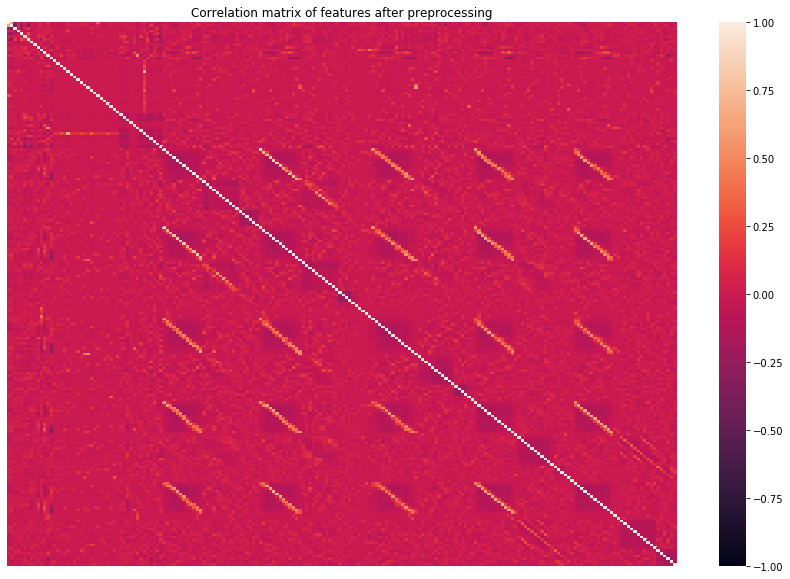

In [82]:
#new correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(X_train_day_gam.corr(),xticklabels =False, yticklabels=False,vmin=-1, vmax=1)
plt.title('Correlation matrix of features after preprocessing')

In [83]:
#days late
lasso_day = Lasso(alpha=0.01).fit(X_train_day_gam, y_train_day)
print(X_train_day_gam.columns[lasso_day.coef_>0])
X_train_day_gam_las = X_train_day_gam.iloc[:,lasso_day.coef_>0]
X_test_day_gam_las = X_test_day_gam.iloc[:,lasso_day.coef_>0]

Index(['Construction Registered Amount', 'Electrical', 'Plumbing',
       'diff_Design Actual Completion Date_Design Schedule and Completion Date',
       'diff_Design Schedule and Completion Date_Title Request',
       'diff_Registration Approved; Pending Order-to- Work Date_Design Actual Completion Date',
       'Coded Unit_Brooklyn Team', 'Coded Unit_Staten Island Team',
       'Design Schedule and Completion Date_year_1995.0',
       'Design Schedule and Completion Date_year_2000.0',
       'Design Schedule and Completion Date_month_12.0',
       'Design Actual Completion Date_year_1996.0',
       'Design Actual Completion Date_year_2001.0',
       'Design Actual Completion Date_month_3.0', 'Title Request_year_1999.0',
       'Title Request_month_8.0', 'Title Request_month_11.0',
       'Registration Approved; Pending Order-to- Work Date_year_1997',
       'Registration Approved; Pending Order-to- Work Date_month_9',
       'Scheduled Completion Date_month_2',
       'Scheduled Com

In [84]:
lasso_cost = Lasso(alpha=0.01).fit(X_train_cost_gam, y_train_cost)
print(X_train_cost_gam.columns[lasso_cost.coef_>0])
X_train_cost_gam_las = X_train_cost_gam.iloc[:,lasso_cost.coef_>0]
X_test_cost_gam_las = X_test_cost_gam.iloc[:,lasso_cost.coef_>0]

Index(['Construction Registered Amount', 'Park', 'Station',
       'diff_Scheduled Completion Date_Registration Approved; Pending Order-to- Work Date',
       'Coded Unit_Manhattan Team', 'Coded Unit_Queens Team',
       'Design Schedule and Completion Date_year_1997.0',
       'Design Schedule and Completion Date_month_12.0',
       'Design Schedule and Completion Date_weekday_2.0',
       'Design Actual Completion Date_month_2.0',
       'Design Actual Completion Date_month_6.0',
       'Design Actual Completion Date_weekday_1.0',
       'Design Actual Completion Date_weekday_2.0', 'Title Request_month_2.0',
       'Title Request_month_8.0', 'Title Request_weekday_1.0',
       'Registration Approved; Pending Order-to- Work Date_month_2',
       'Registration Approved; Pending Order-to- Work Date_month_7',
       'Registration Approved; Pending Order-to- Work Date_weekday_1',
       'Scheduled Completion Date_year_2004'],
      dtype='object')


#### 4.3.2 Model - days late

In [85]:
#baseline - linear regression after feature selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear = LinearRegression()
linear.fit(X_train_day_gam_las,y_train_day)
y_pred_day_train = linear.predict(X_train_day_gam_las)
y_pred_day_test = linear.predict(X_test_day_gam_las)

# r2_day_train = linear.score(X_train_day_gam_las,y_train_day)
# r2_day_test = linear.score(X_test_day_gam_las,y_test_day)

mse_day_train = mean_squared_error(y_train_day, y_pred_day_train)*np.sqrt(scaler_days.var_)[0]


mse_day_test = mean_squared_error(y_test_day, y_pred_day_test)*np.sqrt(scaler_days.var_)[0]



mape_day_train = mean_absolute_percentage_error(y_train_day, y_pred_day_train)
mape_day_test = mean_absolute_percentage_error(y_test_day, y_pred_day_test)

df_gam_bl = pd.DataFrame([[mse_day_train, mape_day_train], [mse_day_test, mape_day_test]], index=['train', 'test'], columns=['MSE', 'MAPE'])
df_gam_bl

,MSE,MAPE
train,153.880497,3.026990
test,161.158624,1.887308


In [86]:
# gam model
from pygam import LinearGAM, s, f

lgam_day = LinearGAM(s(0)+f(1)+f(2)+s(3)+s(4)+s(5)+f(6)+f(7)+f(8)+f(9)+f(10)+f(11)+f(12)+f(13)+
                     f(14)+f(15)+f(16)+f(17)+f(18)+f(19))
lgam_day.gridsearch(X_train_day_gam_las.values,y_train_day)
lgam_day.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     34.4178
Link Function:                     IdentityLink Log Likelihood:                                 -1872.7628
Number of Samples:                         1432 AIC:                                             3816.3613
                                                AICc:                                            3818.2097
                                                GCV:                                                0.8404
                                                Scale:                                              0.8041
                                                Pseudo R-Squared:                                   0.2152
Feature Function                  Lam

/Users/shuchengyan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  import sys


In [87]:
y_pred_day_train = lgam_day.predict(X_train_day_gam_las)
y_pred_day_test = lgam_day.predict(X_test_day_gam_las)

# r2_day_train = r2_score(y_train_day, y_pred_day_train)
# r2_day_test = r2_score(y_test_day, y_pred_day_test)

mse_day_train = mean_squared_error(y_train_day, y_pred_day_train)*np.sqrt(scaler_days.var_)[0]


mse_day_test = mean_squared_error(y_test_day, y_pred_day_test)*np.sqrt(scaler_days.var_)[0]



mape_day_train = mean_absolute_percentage_error(y_train_day, y_pred_day_train)
mape_day_test = mean_absolute_percentage_error(y_test_day, y_pred_day_test)

df_gam_day = pd.DataFrame([[mse_day_train, mape_day_train], [mse_day_test, mape_day_test]], index=['train', 'test'], columns=['MSE', 'MAPE'])
df_gam_day

,MSE,MAPE
train,150.215873,3.033969
test,159.716850,1.879904


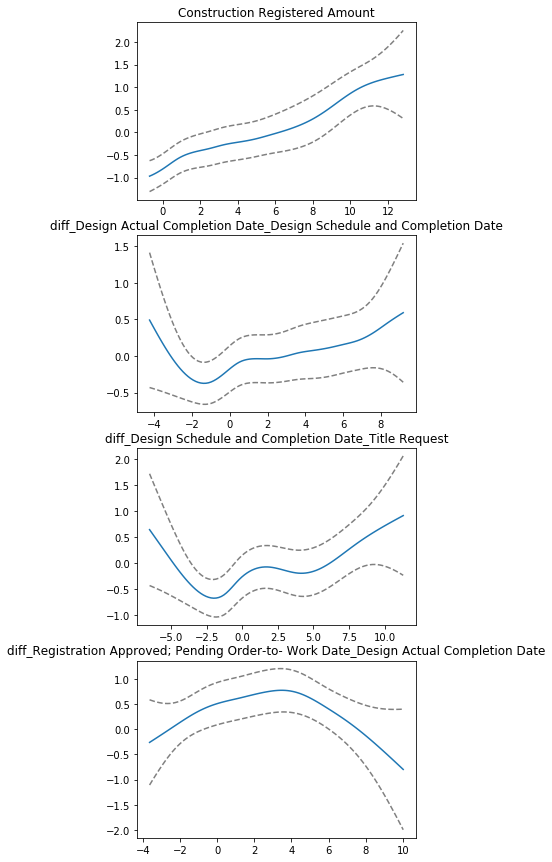

In [88]:
s_col = [0,3,4,5]
plt.rcParams['figure.figsize'] = (5, 15)
fig, axs = plt.subplots(4, 1)
titles = X_train_day_gam_las.columns[s_col]
for i, ax in enumerate(axs):
    XX = lgam_day.generate_X_grid(term = s_col[i])
    ax.plot(XX[:, s_col[i]], lgam_day.partial_dependence(X=XX, term=s_col[i]))
    ax.plot(XX[:, s_col[i]], lgam_day.partial_dependence(X=XX, term=s_col[i], width=0.95)[1], c='grey', ls='--')
    ax.set_title(titles[i])
plt.show()

From the evaluation above, the GAM performs better than baseline linear model after selecting features in the test set. And from the model summary, we can see that all features in the GAM is statistically efficient. From the partial dependence plot, we can see that some of the features have non-linear relationship with response. For example, for the feature diff_Registration Approved; Pending Order-to-Work Date_Deign Actual Completion Date. More days late is expected when the difference between registration approved date and design actual completion date is in the middle of the range. 

#### 4.3.3 Model - cost escalation

In [89]:
#baseline - linear regression after feature selection

linear = LinearRegression()
linear.fit(X_train_cost_gam_las,y_train_cost)
y_pred_cost_train = linear.predict(X_train_cost_gam_las)
y_pred_cost_test = linear.predict(X_test_cost_gam_las)

# r2_cost_train = linear.score(X_train_cost_gam_las,y_train_cost)
# r2_cost_test = linear.score(X_test_cost_gam_las,y_test_cost)

mse_cost_train = mean_squared_error(y_train_cost, y_pred_cost_train)*np.sqrt(scaler_cost.var_)[0]


mse_cost_test = mean_squared_error(y_test_cost, y_pred_cost_test)*np.sqrt(scaler_cost.var_)[0]



mape_cost_train = mean_absolute_percentage_error(y_train_cost, y_pred_cost_train)
mape_cost_test = mean_absolute_percentage_error(y_test_cost, y_pred_cost_test)

df_gam_bl_c = pd.DataFrame([[ mse_cost_train, mape_cost_train], [mse_cost_test, mape_cost_test]], index=['train', 'test'], columns=[ 'MSE', 'MAPE'])
df_gam_bl_c

,MSE,MAPE
train,1.151688,4.881578
test,0.288756,4.002057


In [90]:
lgam_cost = LinearGAM(s(0)+f(1)+f(2)+s(3)+f(4)+f(5)+f(6)+f(7)+f(8)+f(9)+f(10)+f(11)+f(12)+f(13)+
                     f(14)+f(15)+f(16)+f(17)+f(18)+f(19))
lgam_cost.gridsearch(X_train_cost_gam_las.values,y_train_cost)
lgam_cost.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      22.577
Link Function:                     IdentityLink Log Likelihood:                                 -1979.5961
Number of Samples:                         1432 AIC:                                             4006.3461
                                                AICc:                                            4007.1696
                                                GCV:                                                0.9711
                                                Scale:                                              0.9436
                                                Pseudo R-Squared:                                   0.0713
Feature Function                  Lam

/Users/shuchengyan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  after removing the cwd from sys.path.


In [91]:
y_pred_cost_train = lgam_cost.predict(X_train_cost_gam_las)
y_pred_cost_test = lgam_cost.predict(X_test_cost_gam_las)

# r2_cost_train = r2_score(y_train_cost, y_pred_cost_train)
# r2_cost_test = r2_score(y_test_cost, y_pred_cost_test)

mse_cost_train = mean_squared_error(y_train_cost, y_pred_cost_train)*np.sqrt(scaler_cost.var_)[0]


mse_cost_test = mean_squared_error(y_test_cost, y_pred_cost_test)*np.sqrt(scaler_cost.var_)[0]


mape_cost_train = mean_absolute_percentage_error(y_train_cost, y_pred_cost_train)
mape_cost_test = mean_absolute_percentage_error(y_test_cost, y_pred_cost_test)

df_gam_cost = pd.DataFrame([[mse_cost_train, mape_cost_train], [mse_cost_test, mape_cost_test]], index=['train', 'test'], columns=['MSE', 'MAPE'])
df_gam_cost

,MSE,MAPE
train,1.150846,3.908982
test,0.261249,3.662815


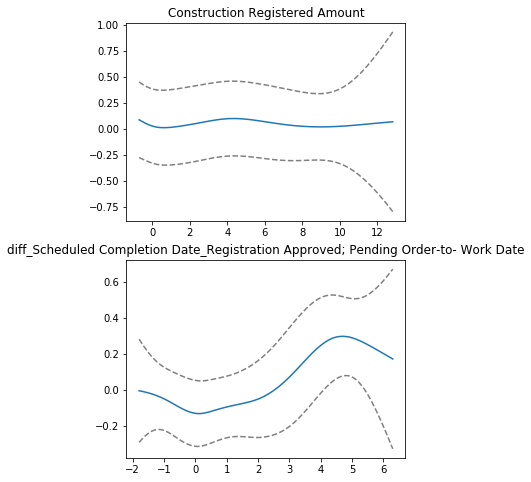

In [92]:
s_col = [0,3]
plt.rcParams['figure.figsize'] = (5, 8)
fig, axs = plt.subplots(2, 1)
titles = X_train_cost_gam_las.columns[s_col]
for i, ax in enumerate(axs):
    XX = lgam_cost.generate_X_grid(term = s_col[i])
    ax.plot(XX[:, s_col[i]], lgam_cost.partial_dependence(X=XX, term=s_col[i]))
    ax.plot(XX[:, s_col[i]], lgam_cost.partial_dependence(X=XX, term=s_col[i], width=0.95)[1], c='grey', ls='--')
    ax.set_title(titles[i])
plt.show()

From the evaluation above, the GAM for cost escalation performs better than the baseline linear regression after feature selection model. It means that their maybe some non-linear relationship for predicting cost escalation. From the partial dependence plot, the relationship is obvious for diff_Scheduled Completion Date_Registration Approved; Pending Order-to-Work Date. With the increase of this feature, the expected cost escalation firsly decreases then increases and lastly decrease. However, from p value the relationship is not significant.

### 4.5 Trees

In this part, we assume that the response and features are not linear related and the relationship can be captured by decision tree.

#### 4.5.1 Model - days late

In [93]:
# use all features to grow the tree
tr = DecisionTreeRegressor(min_samples_split= 0.2 ,min_samples_leaf=0.05)
tr.fit(X_train_day_gam,y_train_day)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.05, min_samples_split=0.2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

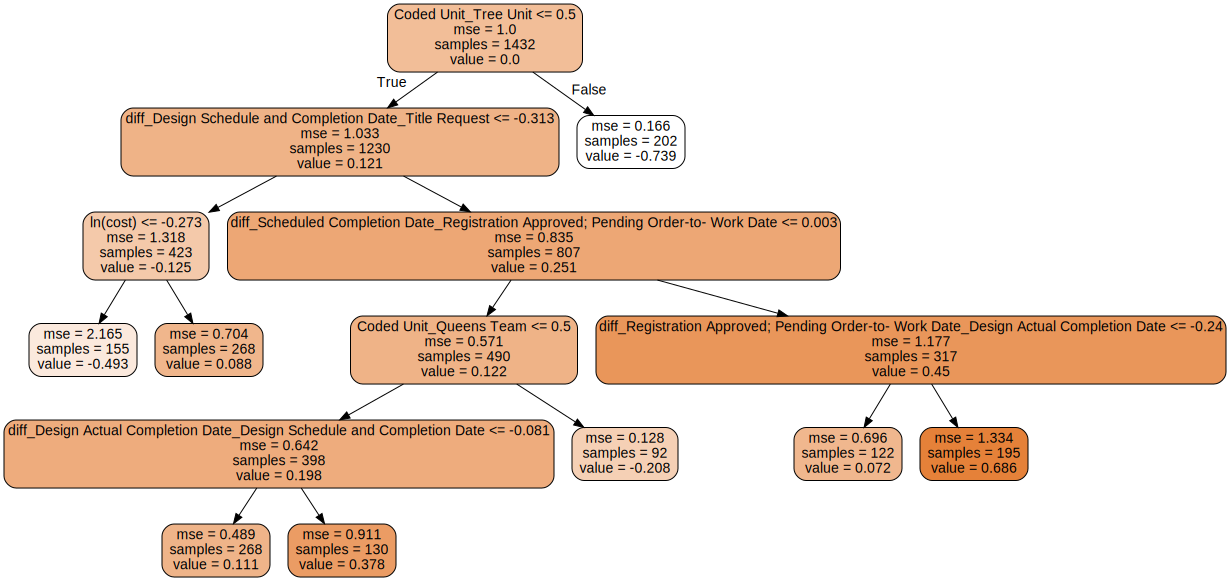

In [94]:
dot_data = sklearn.tree.export_graphviz(tr
                                ,out_file=None
                                ,feature_names= X_train_day_gam.columns
                                ,filled=True
                                ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

In [95]:
y_pred_day_train = tr.predict(X_train_day_gam)
y_pred_day_test = tr.predict(X_test_day_gam)

# r2_day_train = r2_score(y_train_day, y_pred_day_train)
# r2_day_test = r2_score(y_test_day, y_pred_day_test)

mse_day_train = mean_squared_error(y_train_day, y_pred_day_train)*np.sqrt(scaler_days.var_)[0]

mse_day_test = mean_squared_error(y_test_day, y_pred_day_test)*np.sqrt(scaler_days.var_)[0]

mape_day_train = mean_absolute_percentage_error(y_train_day, y_pred_day_train)
mape_day_test = mean_absolute_percentage_error(y_test_day, y_pred_day_test)

df_tree_day = pd.DataFrame([[mse_day_train, mape_day_train], [mse_day_test, mape_day_test]], index=['train', 'test'], columns=['MSE', 'MAPE'])
df_tree_day

,MSE,MAPE
train,155.540583,3.117664
test,164.631000,1.684132


This result is different from linear model. The Tree Unit is the most important feature, but it is now shown in the features selected by Lasso regression. It it has Tree Unit, the expected days late will be lower. It shows that the regression tree captures some other patterns.

#### 4.5.2 Model - cost escalation

In [96]:
tr = DecisionTreeRegressor(min_samples_split= 0.2 ,min_samples_leaf=0.05)
tr.fit(X_train_cost_gam,y_train_cost)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.05, min_samples_split=0.2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

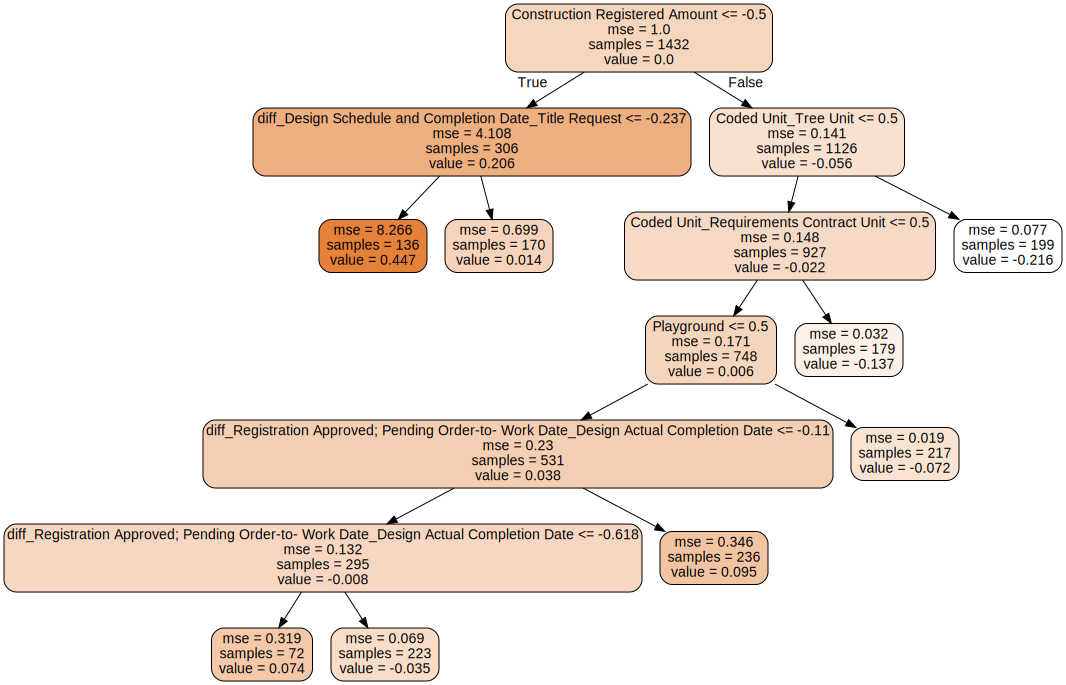

In [97]:
dot_data = sklearn.tree.export_graphviz(tr
                                ,out_file=None
                                ,feature_names= X_train_day_gam.columns
                                ,filled=True
                                ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

In [98]:
y_pred_cost_train = tr.predict(X_train_cost_gam)
y_pred_cost_test = tr.predict(X_test_cost_gam)

# r2_cost_train = r2_score(y_train_cost, y_pred_cost_train)
# r2_cost_test = r2_score(y_test_cost, y_pred_cost_test)

mse_cost_train = mean_squared_error(y_train_cost, y_pred_cost_train)*np.sqrt(scaler_cost.var_)[0]


mse_cost_test = mean_squared_error(y_test_cost, y_pred_cost_test)*np.sqrt(scaler_cost.var_)[0]



mape_cost_train = mean_absolute_percentage_error(y_train_cost, y_pred_cost_train)
mape_cost_test = mean_absolute_percentage_error(y_test_cost, y_pred_cost_test)

df_tree_cost = pd.DataFrame([[mse_cost_train, mape_cost_train], [mse_cost_test, mape_cost_test]], index=['train', 'test'], columns=['MSE', 'MAPE'])
df_tree_cost

,MSE,MAPE
train,1.201364,1.934704
test,0.221378,2.836915


It shows that the tree model performs better than GAM in predicting cost escalation. The most important feature is ln(cost). A lower estimated cost predicts more cost escalation. It makes sense because lower estimation maybe not realistic and it's harder to keep in the budget.

#### 4.5.3 Random Forest

In [99]:
n_estimators = [int(x) for x in np.linspace(start = 400, stop = 1000, num = 3)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 50, num = 2)]
max_depth.append(None)
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [100]:
random_grid

{'n_estimators': [400, 700, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 50, None],
 'min_samples_split': [2, 5],
 'min_samples_leaf': [1, 2]}

In [101]:
rf_day = RandomForestRegressor()
rf_random_day = RandomizedSearchCV(estimator = rf_day, param_distributions = random_grid, n_iter = 10, cv = 3, n_jobs = -1)
rf_random_day.fit(X_train_day, y_train_day)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [102]:
rf_random_day.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [103]:
rf_cost = RandomForestRegressor()
rf_random_cost = RandomizedSearchCV(estimator = rf_cost, param_distributions = random_grid, n_iter = 10, cv = 3, n_jobs = -1)
rf_random_cost.fit(X_train_cost, y_train_cost)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [104]:
rf_random_cost.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [105]:
clf_day = rf_random_day.best_estimator_
clf_cost = rf_random_cost.best_estimator_

In [106]:
y_pred_day = clf_day.predict(X_test_day)
y_pred_cost = clf_cost.predict(X_test_cost)

In [107]:
mse_day =  mean_squared_error(y_test_day, y_pred_day) * np.sqrt(scaler_days.var_)[0]
mse_cost =  mean_squared_error(y_test_cost, y_pred_cost) * np.sqrt(scaler_cost.var_)[0]

mape_day = mean_absolute_percentage_error(y_test_day, y_pred_day)
mape_cost = mean_absolute_percentage_error(y_test_cost, y_pred_cost)

df_rf = pd.DataFrame([[mse_day, mape_day], [mse_cost, mape_cost]], index=['days late', 'cost escalation'], columns=['MSE', 'MAPE'])
df_rf

,MSE,MAPE
days late,112.329218,1.547429
cost escalation,0.233071,1.951620


In [108]:
df_rf = pd.DataFrame([[mse_day, mape_day], [mse_cost, mape_cost]], index=['days late', 'cost escalation'], columns=['MSE', 'MAPE'])
df_rf

,MSE,MAPE
days late,112.329218,1.547429
cost escalation,0.233071,1.951620


### 4.6 Clustering

Below, we explore two clustering algorithms on the dataset: $k$-Means and DBSCAN. First, we explore $k$-Means. We calculate the inertia and the average silhouette score for several values of $k$ to see what the optimal value of $k$ is.

In [109]:
# 4.5.1 model specific data preprocessing
# 4.5.2 model building
# 4.5.3 model evaluation
# 4.5.4 model summary/insights/graphs/table

kVals = list(range(1, 16))
wss = []
scores = [0]
for k in kVals:
    km = KMeans(n_clusters = k, init = 'random', n_init = 46, random_state = 109).fit(X_train_day)
    wss.append(km.inertia_)

    if k > 1:
        score = silhouette_score(X_train_day, km.labels_)
        scores.append(score)

Text(0.5, 1.0, 'Silhouette Scores for Varying $k$ values')

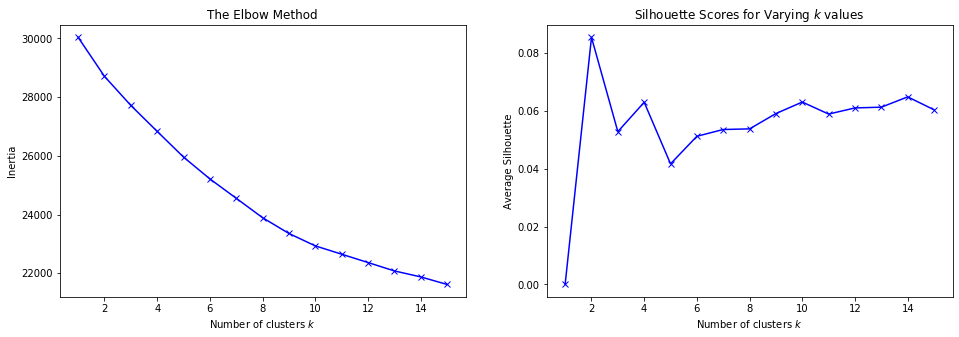

In [110]:
# Plot inertia
plt.figure(figsize = (16, 5))
plt.subplot(1, 2, 1)
plt.plot(kVals, wss, 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Inertia')
plt.title('The Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(kVals, scores, 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Average Silhouette')
plt.title('Silhouette Scores for Varying $k$ values')

By the elbow method, we look for a significant elbow in the plot and use $k$ equal to that value. However, we do not see really any significant elbows. We see a slight one at $k = 2$. In the plot of silhouette scores, we see a peak at $k = 2$, so we will try $k = 2$.

Text(0, 0.5, '2nd PCA Vector')

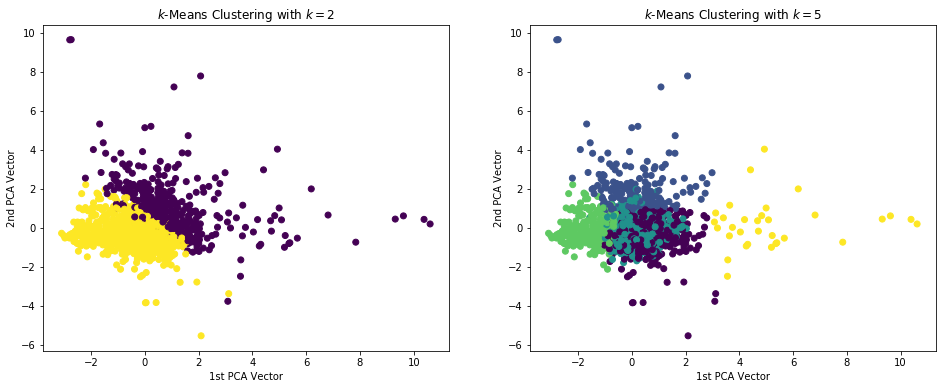

In [111]:
km2 = KMeans(n_clusters = 2, init = 'random', random_state = RANDOM_STATE).fit(X_train_day)
km5 = KMeans(n_clusters = 5, init = 'random', random_state = RANDOM_STATE).fit(X_train_day)

pca = PCA(n_components = 2)
pca.fit(X_train_day)
vectors = pca.transform(X_train_day)

plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.scatter(vectors[:, 0], vectors[:, 1], c = km2.labels_)
plt.title('$k$-Means Clustering with $k = 2$')
plt.xlabel('1st PCA Vector')
plt.ylabel('2nd PCA Vector')

plt.subplot(1, 2, 2)
plt.scatter(vectors[:, 0], vectors[:, 1], c = km5.labels_)
plt.title('$k$-Means Clustering with $k = 5$')
plt.xlabel('1st PCA Vector')
plt.ylabel('2nd PCA Vector')

It seems like $k = 2$ does not yield a good clustering. We tried $k = 5$ and it seemed to yield a better clustering. It does seem like there are more than just two 'groups' of data points, so we used a larger value of $k$. Below, we will see how DBSCAN performs.

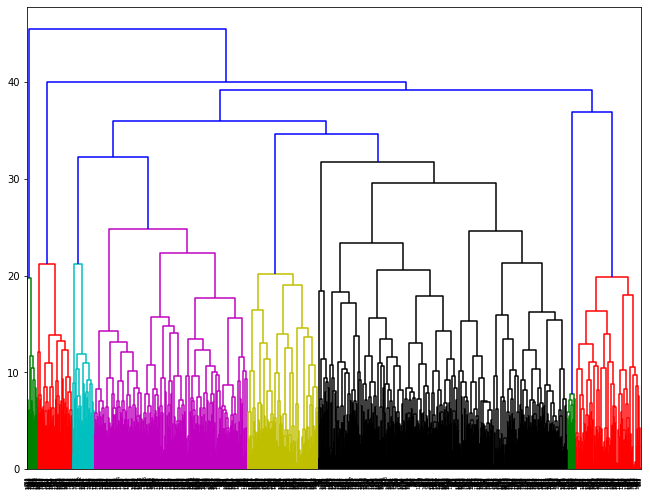

In [112]:
dbscan = DBSCAN().fit(X_train_day)

plt.figure(figsize = (11, 8.5))
dist_mat = pdist(X_train_day, metric = "euclidean")
ward_data = hac.ward(dist_mat)

hac.dendrogram(ward_data)
plt.show()

Using DBSCAN, we see that we get 7 clusters, which is more evidence for what we saw above. It does seem like there are more than just two groups of data points, and more like 5 or 7. It would be interesting in the future to try to compare some of the observations in each cluster and see what similarities there are between each cluster. There may be obvious similarities or the similarities may be much more subtle and only be picked up by the clustering algorithms.

### 4.7 Neural Networks

#### Days Late

Finally, we try a neural network for predicting the number of days late a project is. We build a simple feed-forward neural network with four hidden layers. Since neural networks are not interpretable models, we did not put a lot of time into modeling using a neural network, but we wanted to see if a fairly simple neural network model could make predictions that were better than the other models.

In [113]:
# 4.6.1 model specific data preprocessing
# 4.6.2 model building
# 4.6.3 model evaluation
# 4.6.4 model summary/insights/graphs/table

model1 = Sequential()
model1.add(Dense(64, input_shape = (X_train_day.shape[1], ), activation = 'relu'))
model1.add(Dense(32, activation = 'relu'))
model1.add(Dense(16, activation = 'relu'))
model1.add(Dense(8, activation = 'relu'))
model1.add(Dense(1, activation = 'linear'))

model1.compile(optimizer = 'adam', loss = 'mse')
history1 = model1.fit(X_train_day, y_train_day,
                      validation_data = (X_test_day, y_test_day),
                      epochs = 50, verbose = 0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


(0.7787460343464793, 2)

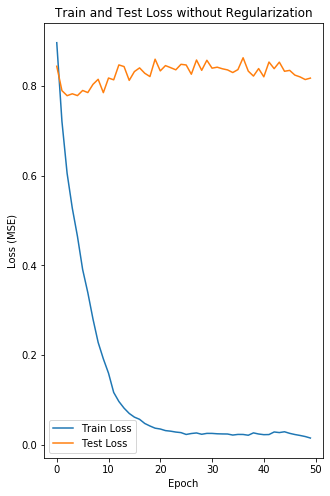

In [114]:
plt.plot(history1.history['loss'], label = 'Train Loss')
plt.plot(history1.history['val_loss'], label = 'Test Loss')
plt.title('Train and Test Loss without Regularization')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
min(history1.history['val_loss']), np.argmin(history1.history['val_loss'])

In [115]:
model2 = Sequential()
model2.add(Dense(64, input_shape = (X_train_day.shape[1], ), activation = 'relu'))
model2.add(Dropout(0.35))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dropout(0.35))
model2.add(Dense(16, activation = 'relu'))
model2.add(Dropout(0.35))
model2.add(Dense(8, activation = 'relu'))
model2.add(Dropout(0.35))
model2.add(Dense(1, activation = 'linear'))

model2.compile(optimizer = 'adam', loss = 'mse')
history2 = model2.fit(X_train_day, y_train_day,
                      validation_data = (X_test_day, y_test_day),
                      epochs = 50, verbose = 0)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


(0.6345533209972541, 44)

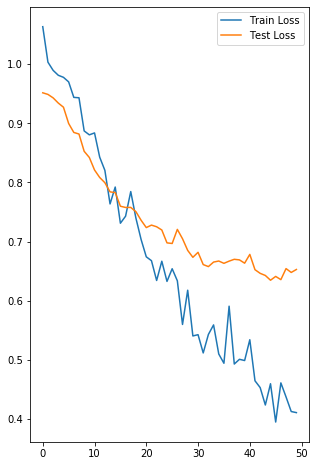

In [116]:
plt.plot(history2.history['loss'], label = 'Train Loss')
plt.plot(history2.history['val_loss'], label = 'Test Loss')
plt.legend()
min(history2.history['val_loss']), np.argmin(history2.history['val_loss'])

In [117]:
model3 = Sequential()
model3.add(Dense(64, input_shape = (X_train_day.shape[1], ), activation = 'relu'))
model3.add(Dropout(0.35))
model3.add(Dense(32, activation = 'relu'))
model3.add(Dropout(0.35))
model3.add(Dense(16, activation = 'relu'))
model3.add(Dropout(0.35))
model3.add(Dense(8, activation = 'relu'))
model3.add(Dropout(0.35))
model3.add(Dense(1, activation = 'linear'))

model3.compile(optimizer = 'adam', loss = 'mse')
history3 = model3.fit(X_train_day, y_train_day,
                      validation_data = (X_test_day, y_test_day),
                      epochs = 40, verbose = 0)

In [118]:
pred = model3.predict(X_test_day)
r2 = r2_score(y_test_day, pred)
mse_day = mean_squared_error(y_test_day, pred) * np.sqrt(scaler_days.var_)[0]
mape_day = mean_absolute_percentage_error(y_test_day, pred)

print('R^2 =', r2.round(3))
print('MSE =', mse.round(3))
print('sqrt(MSE) =', np.sqrt(mse).round(3))
print('MAPE =', mape.round(3))

R^2 = 0.273
MSE = 180.226
sqrt(MSE) = 13.425
MAPE = 1.077


We see that our first model is very clearly overfit. We achieve the best accuracy on the test set after only six iterations but the training loss continues to decrease. We experimented with different values of dropout and determined 0.35 seemed to be a good value, and we would stop training after about 40 epochs to prevent overfitting. We see that the neural network does make an improvement over the something simple like a $k$-NN model, but the increase isn't ground-breaking and is still pretty low.

#### Cost Escalation

In [119]:
model4 = Sequential()
model4.add(Dense(64, input_shape = (X_train_day.shape[1], ), activation = 'relu'))
model4.add(Dropout(0.35))
model4.add(Dense(32, activation = 'relu'))
model4.add(Dropout(0.35))
model4.add(Dense(16, activation = 'relu'))
model4.add(Dropout(0.35))
model4.add(Dense(8, activation = 'relu'))
model4.add(Dropout(0.35))
model4.add(Dense(1, activation = 'linear'))

model4.compile(optimizer = 'adam', loss = 'mse')
history4 = model3.fit(X_train_day, y_train_cost,
                      validation_data = (X_test_day, y_test_cost),
                      epochs = 40, verbose = 0)

0.16282680555761858

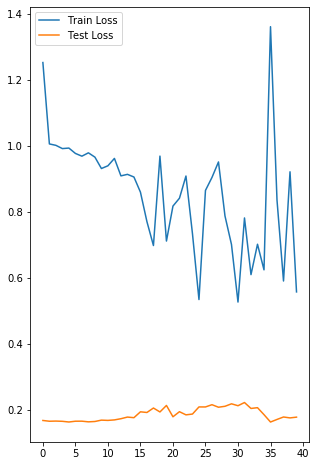

In [120]:
plt.plot(history4.history['loss'], label = 'Train Loss')
plt.plot(history4.history['val_loss'], label = 'Test Loss')
plt.legend()
min(history4.history['val_loss'])

In [121]:
pred = model4.predict(X_test_cost)
r2 = r2_score(y_test_cost, pred)
mse_cost = mean_squared_error(y_test_day, pred) * np.sqrt(scaler_days.var_)[0]
mape_cost = mean_absolute_percentage_error(y_test_day, pred)

print('R^2 =', r2.round(3))
print('MSE =', mse.round(3))
print('sqrt(MSE) =', np.sqrt(mse).round(3))
print('MAPE =', mape.round(3))

R^2 = -0.347
MSE = 180.226
sqrt(MSE) = 13.425
MAPE = 1.077


In [122]:
df_nn = pd.DataFrame([[mse_day, mape_day], [mse_cost, mape_cost]], index=['days late', 'cost escalation'], columns=['MSE', 'MAPE'])
df_nn

,MSE,MAPE
days late,133.304449,2.246219
cost escalation,198.136635,1.599942


We try the same model to predict the cost escalation. Again, we get a negative $R^2$ here, like we did using $k$-NN. The number of days late is a hard problem, but the cost escalation is even harder. Again, it seems like there are just too many random factors that we cannot account for in this dataset. Things can break, people can make mistakes, funding can change, and this can happen totally randomly, so the cost escalation is a very hard problem to predict in real-life data as well.

However, it still seems like we should at least be able to get an $R^2$ greater than zero using a neural network. It was surprising that this model did not perform better. The plot of the loss was confusing since the test loss basically never moves as we train. We were unsure if there was a problem with our model or if the cost escalation is just very hard to predict.

## 5. Discussion/insights

We can clearly see the potential applications of modeling this dataset. An accurate model could save a company or the government millions of dollars and work for employees. This could be applied to other projects that are more likely to complete successfully than to be weeks or months late, or even never finish.

Take as a real-world example, the Cincinnati subway. Construction began on the Cincinnati subway in the early 1900s, but in 1928 it was cancelled indefinitely. To this day, the subway has never been completed and is the largest abandoned subway system in the world. Millions of dollars, or the equivalent of billions of dollars today, was spent to dig tunnels under streets, build stations, and lay track, and hundreds or thousands of man-hours was spent that could have been applied to any number of other projects.

If it could have somehow been determined that this project would never complete and would be a waste of money and time, then the project could have been scrapped and the money could be spent elsewhere. In the early 1900s, machine learning and data science was barely a thought in the minds of research scientists. However, an algorithm similar to one of these that we have developed could have potentially gave insight to the individuals or groups that proposed and designed the subway system. In the modern age that we live in, where nearly every company uses machine learning and data science in one form or another, there is no reason that this cannot be leveraged to save time and money for companies and government agencies.

We see some interesting things in the EDA we do on this dataset. The word clouds are the most interesting. We can see noticeable differences between projects that complete early versus late, and projects that go over or underbudget. Projects like tree planting and street-related projects seem to complete early, while projects relating to park, 'comfort station', and electrical seem to end late. However, projects like 'comfort station', park, street, and electrical seem to end underbudget, but projects relating to parks or playgrounds end overbudget. This could be used to request more time or more money for a project if it falls into one of these categories.

We use the baseline model to see how well our other models are doing. Simple models like $k$-nearest neighbors perform better than the baseline, but are not great. Regular linear regression performs terribly, but this is due to the number of predictors we have in the dataset and the correlation between some columns. We use regularization to solve this, and see that after using regularization like ridge and lasso, we do about as well as $k$-nearest neighbors, but we have much more interpretability. Using linear regression, we see that the most important variables are the teams that are performing the project, meaning that some teams have significantly better or worse completion rates than others. This could be leveraged if a manager is giving a project to a team to complete. If one team regularly hits their deadlines but another is on average late, we would rather have the first team working on the project.

We use other models, like GAM, which somewhat surprisingly does not perform much better. We thought the GAM might capture some non-linearities in the data, but it performed slightly worse. The neural network did not perform as well as we expected either. The tree-based models actually performed the best. We were able to achieve an MSE of around 112, which was significantly better than the other models we anaylzed.

There is a lot of future work that a study like this yields. There are lots of other things we could try with the models we are already using, like trying different functional forms like including polynomial terms, different architectures for the neural network, and more. There are also lots of other statistical models that could be applied to this dataset that may be able to model the data better than these models could.

There is more statistical inference we would like to do. We would like to look at the variable importance found in the tree-based models, as well as look at specific coefficients for the regression models. The libraries we used, `sklearn` to be specific, does not offer inference on variables, but we could use another library like `statsmodels` or another language like `R` to analyze the models and make inferences.

Finally, it would be interesting to apply these models to other datasets. We may be able to make inferences or predictions on the other datasets more effectively than we can on this one. It would also be interesting to analyze trends in the models between the datasets.

None of our models did great, but this is likely just because this is a tough problem and there are so many random aspects that affect a project. Funding can get pulled, accidents can happen and things can break, people can get sick, etc.